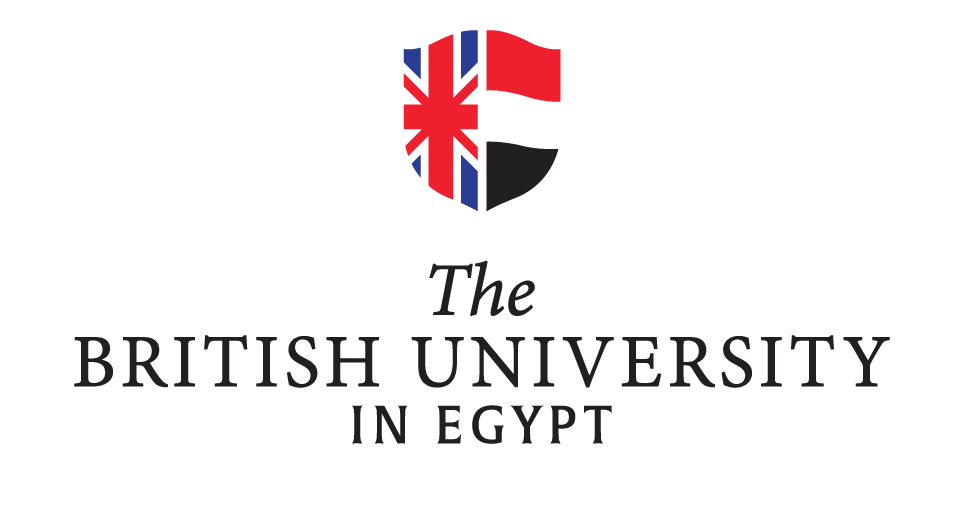


<h2 style="text-align: center;"></h2>
<h2 style="text-align: center;">Introduction to Data Science</h2>
<h2 style="text-align: center;">23CSAI01I</h2>
<h3 style="text-align: center;">Phase 2 Report</h3>


<h2 style="text-align: center;"> Data Scientist Salary </h2>

<h2 style="text-align: center;">
Amr228074 - Loay222929 -  Sameh218767
<h3 style="text-align: center;">Group 19</h3>




In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import numpy as np
import warnings

from mpl_toolkits.mplot3d import Axes3D ## to enable 3D plotting
import ipywidgets as widgets # this makes me have iteractive widgets(this will be use to answer Q3.2)
from ipywidgets import interactive ## this for interactive plots.

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('data_cleaned_2021.csv')
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 100
print(df.shape)

(742, 42)


# Overview of The Dataset

**About Dataset:**
This dataset provides insights into data scientist salaries and job postings in the United States for the year 2021. It contains information on 742 unique job postings and is designed for data analysis and modeling. This dataset provides valuable data for anyone interested in data science careers, salary trends, or the skills landscape for data scientists in the US and acts as a reference point and training set to predict future changes and trends in the industry.

**Source:** https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor


---
**Note**: There is a second dataset that will be imported later for specific questions for a more comprehensive analysis

In [5]:
df.head()

index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD   
2                                KnowBe4\n4.8   Clearwater, FL   
3                                   PNNL\n3.8     Richland, WA   
4                     Affinity Solutions\n2.9     New York, NY   

     Headquarters          Size  Founded   Type of ownership  \
0      Goleta, CA   501 - 1000      1973   Company - Private   
1   Baltimore, MD       10000+      1984  Other Organization   
2  Clearwater, FL   501 - 1000      2010   Company - Private   
3    Richland, WA  1001 - 5000      1965          Government   
4    New York, NY     51 - 200      1998   Company - Private   

                           Industry                        Sector  \
0               Aerospace & Defense           Aerospace & Defense   
1  Health Care Services & Hospitals                   Health Care   
2                 Security Services             Business Services   
3                            Energy  Oil, Gas, Energy & Utilities   
4           Advertising & Marketing             Business Services   

                            Revenue  \
0         $50 to $100 million (USD)   
1            $2 to $5 billion (USD)   
2        $100 to $500 million (USD)   
3  $500 million to $1 billion (USD)   
4          Unknown / Non-Applicable   

                                         Competitors  Hourly  \
0                                                 -1       0   
1                                                 -1       0   
2                                                 -1       0   
3  Oak Ridge National Laboratory, National Renewa...       0   
4               Commerce Signals, Cardlytics, Yodlee       0   

   Employer provided  Lower Salary  Upper Salary  Avg Salary(K)  \
0                  0            53            91           72.0   
1                  0            63           112           87.5   
2                  0            80            90           85.0   
3                  0            56            97           76.5   
4                  0            86           143          114.5   

                             company_txt Job Location  Age  Python  spark  \
0                      Tecolote Research           NM   48       1      0   
1  University of Maryland Medical System           MD   37       1      0   
2                                KnowBe4           FL   11       1      1   
3                                   PNNL           WA   56       1      0   
4                     Affinity Solutions           NY   23       1      0   

   aws  excel  sql  sas  keras  pytorch  scikit  tensor  hadoop  tableau  bi  \
0    0      1    0    1      0        0       0       0       0        1   1   
1    0      0    0    0      0        0       0       0       0        0   0   
2    0      1    1    1      0        0       0       0       0        0   0   
3    0      0    0    0      0        0       0       0       0        0   0   
4    0      1    1    1      0        0       0       0       0        0   0   

   flink  mongo  google_an   job_title_sim se

# Data Preprocessing


Important Note: The following steps outline the general data cleaning of the dataset and represents only an early stage of data pre-processing. Each specific question you explore from this data may necessitate additional, tailored pre-processing steps to ensure optimal analysis.

In [6]:
def clean_salary(salary_str):
  pattern = r"\([^)]*\)"
  found = re.search(pattern, salary_str)
  if found:
    return salary_str[:found.start()].strip()
  else:
    return salary_str

In [7]:
def count_competitors(competitors):
  if competitors == '-1':
    return 0
  else:
    return len(competitors.split(','))

In [8]:
def seniority_binarization(seniority):
  if seniority == 'sr':
    return 1
  else:
    return 0

In [9]:
def lower_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[0].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [10]:
def upper_size(size):
  range_pattern = r'\d+ \- \d+'
  plus_pattern = r'\+'
  found_range = re.search(range_pattern, size)
  found_plus = re.search(plus_pattern, size)
  if found_range:
    bounds = size.split('-')
    return int(bounds[1].strip())
  elif found_plus:
    return size[:found_plus.start()]
  else:
    return 0

In [11]:
def Remove_numerical_outliers(df,Column_name,Excluded_range):
    df = df[df[Column_name] <= Excluded_range]

In [12]:
# General Data cleaning beginning

# Remove duplicates
df.drop_duplicates(keep=("last"), inplace=True)

#Remove (Glassdoor est.)
df['Salary Estimate'] = df['Salary Estimate'].apply(clean_salary)

#Encoding
df['Competitors'] = df['Competitors'].apply(count_competitors)

# Remove negative ratings
df = df[df['Rating'] >= 0]

# Move values from company_txt to Company Name
df.loc[:, 'Company Name'] = df['company_txt']

# Seperate city from state
df.insert(7, 'Job City Location', df['Location'].str.split(',').str[0])

# Binarization of Senriority
df['seniority_by_title']=df['seniority_by_title'].apply(seniority_binarization)

# Seperate Size into Lower Size and Upper Size
df.insert(9, 'Lower Size', df['Size'].apply(lower_size))
df.insert(10, 'Upper Size', df['Size'].apply(upper_size))

# Change Salary data type
df['Avg Salary(K)'] = df['Avg Salary(K)'].astype(float)

# Drop redundant columns
df.drop(columns=['Size','company_txt', 'Salary Estimate', 'Location'], inplace=True)



df = df[df['Industry'] != '-1']
df = df[df['Founded'] != -1]


# Dataset After Cleaning

In [13]:
df.head(100)

index                                          Job Title  \
0        0                                     Data Scientist   
1        1                          Healthcare Data Scientist   
2        2                                     Data Scientist   
3        3                                     Data Scientist   
4        4                                     Data Scientist   
5        5                                     Data Scientist   
6        6                                     Data Scientist   
7        7                                     Data Scientist   
8        8                                 Research Scientist   
9        9                                     Data Scientist   
10      10                                     Data Scientist   
11      11                                     Data Scientist   
12      12                  Staff Data Scientist - Technology   
13      13                                       Data Analyst   
14      14                                     Data Scientist   
15      15                                    Data Engineer I   
16      16                            Scientist I/II, Biology   
17      17                            Customer Data Scientist   
18      18             Data Scientist - Health Data Analytics   
19      19                                     Data Scientist   
20      20                                     Data Scientist   
21      21           Senior Data Scientist / Machine Learning   
22      22                      Data Scientist - Quantitative   
23      23                                     Data Scientist   
24      25                                     Data Scientist   
25      26                      Digital Health Data Scientist   
26      27                                     Data Scientist   
27      28                             Associate Data Analyst   
28      29                            Clinical Data Scientist   
29      30                                     Data Scientist   
30      31                                     Data Scientist   
31      32                                     Data Scientist   
32      33           Data Scientist / Machine Learning Expert   
33      34                                     Data Scientist   
34      35                                     Data Scientist   
35      36                                   Web Data Analyst   
36      37                                     Data Scientist   
37      38                                     Data Scientist   
38      39                              Senior Data Scientist   
39      40                                      Data Engineer   
40      41                                       Data Analyst   
42      44            Data Scientist - Algorithms & Inference   
43      45                                          Scientist   
44      46                              Senior Data Scientist   
46      49                                Lead Data Scientist   
47      50                             Associate Data Analyst   
48      51                        Spectral Scientist/Engineer   
49      52  College Hire - Data Scientist - Open to Decemb...   
50      54                                     Data Scientist   
51      55             Data Scientist, Office of Data Science   
52      56                               Data Science Analyst   
53      57                                     Data Scientist   
54      58                                     Data Scientist   
55      59                                     Data Scientist   
56      60                                     Data Scientist   
57      61                                     Data Scientist   
58      62                                     Data Scientist   
59      63                                     Data Scientist   
60      65                              Senior Data Scientist   
61      66                                     Data Scientist   
62      67                         Senio

# General Visualization

Before we get down to numbers, let's visualize the data. Charts and graphs will act as our compass, revealing hidden trends and relationships and pave the way for deeper insights into these job markets as we go further on.




<h1>Summary Statistics and Distribution of Numerical Variables</h1>

We start by diving into the numerical data (like 'Rating', 'Avg Salary', and 'Age') using summary statistics. This gives us a quick snapshot of the data's center (average, median) and spread (standard deviation) with describe(). Visualizing these distributions with histograms helps us understand if the data is skewed or follows a normal pattern. This initial analysis is crucial for choosing the most appropriate techniques for further exploration.

           Rating  Avg Salary(K)         Age
count  690.000000     690.000000  690.000000
mean     3.703188     101.055072   51.166667
std      0.554377      37.508111   54.108742
min      1.900000      15.500000    2.000000
25%      3.400000      73.000000   14.000000
50%      3.700000      96.000000   29.000000
75%      4.000000     123.250000   63.000000
max      5.000000     254.000000  277.000000


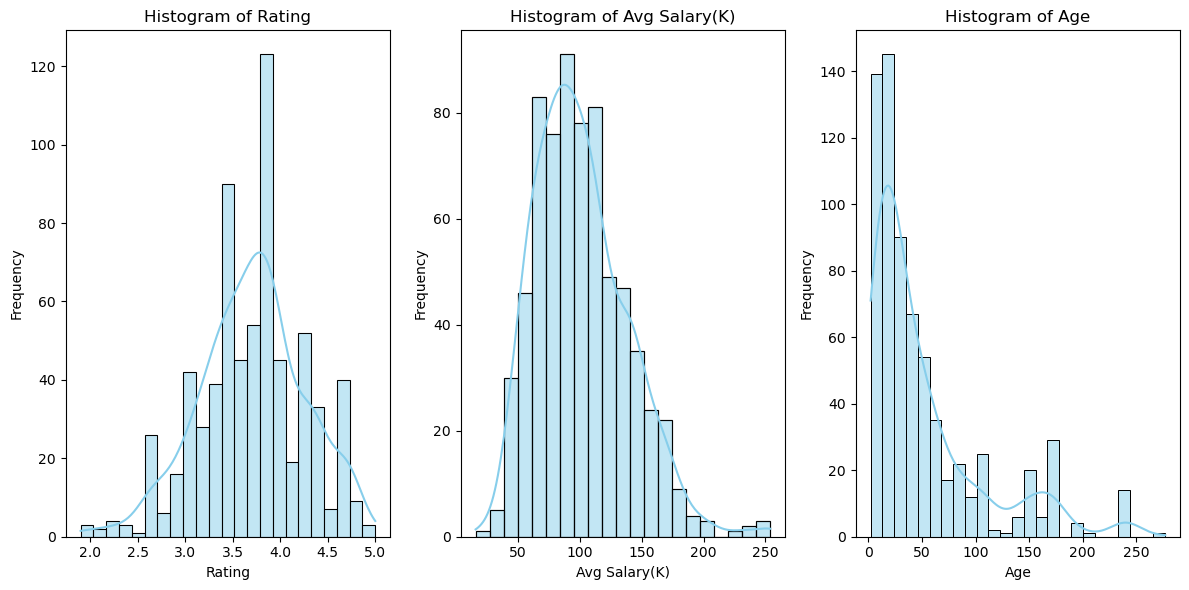

In [14]:
numerical_columns = ['Rating', 'Avg Salary(K)', 'Age']

summary_stats = df[numerical_columns].describe()
print(summary_stats)

plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<h1> Violin Plots for Exploring Numerical Variable Distributions</h1>

 Violin plots offer another way to explore the distribution of numerical variables. They provide a combined view of the data's spread, density, and potential outliers. Analyzing these plots alongside histograms can give us a more comprehensive understanding of how the data is distributed.

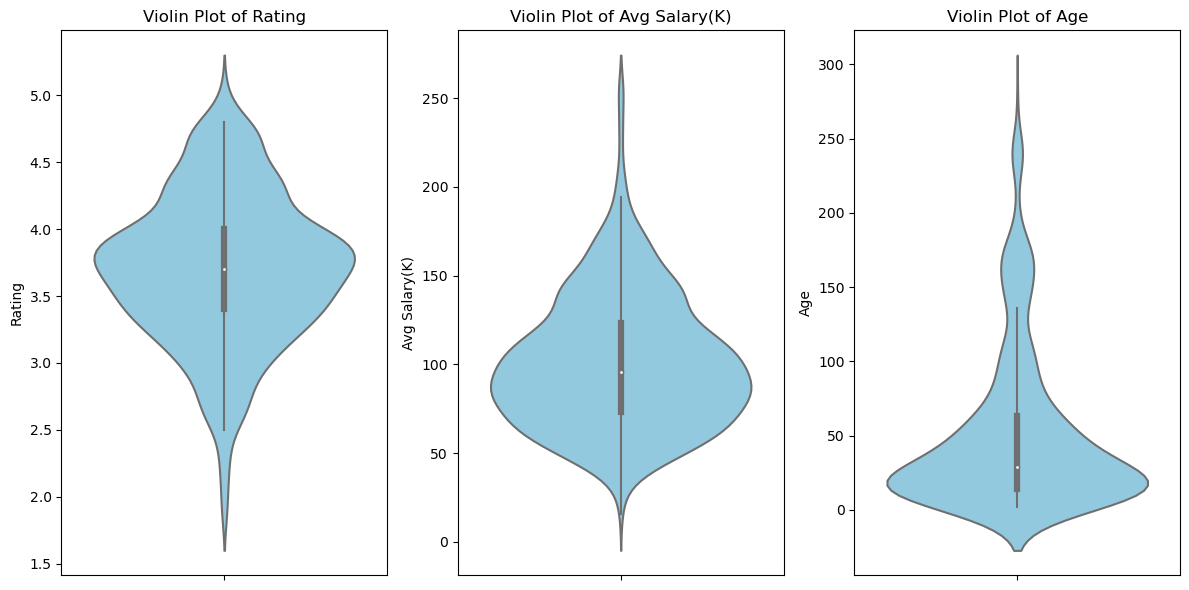

In [15]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.violinplot(y=df[column], color='skyblue')
    plt.title(f'Violin Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


<h1>Boxplots for Examining Numerical Variable Spread</h1>

Boxplots come in handy to examine the spread of numerical variables. They effectively illustrate the distribution, highlighting the median, quartiles (25th and 75th percentiles), and potential outliers. Identifying outliers and understanding the spread of data points is essential for drawing meaningful conclusions from our analysis later.

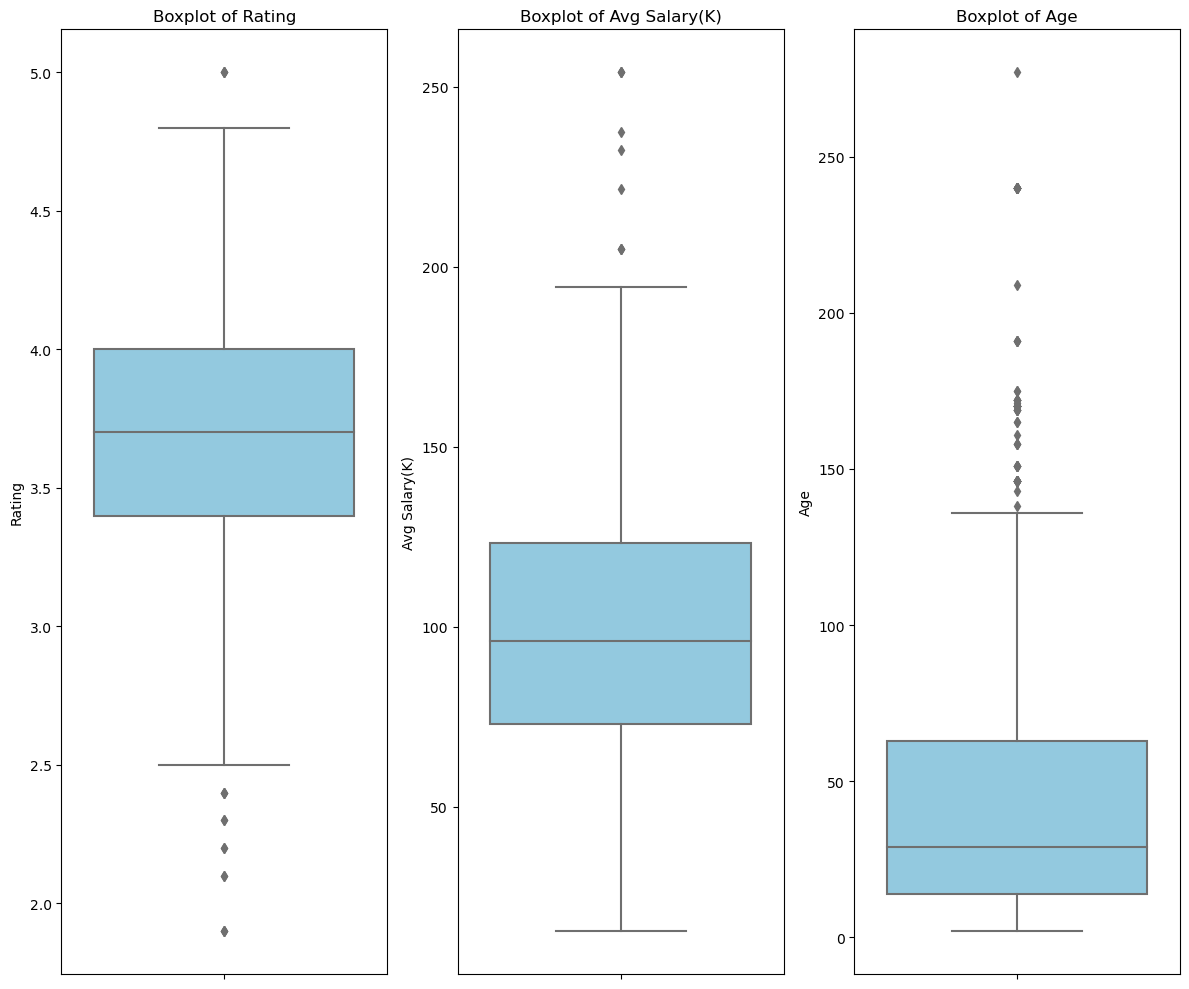

In [16]:
plt.figure(figsize=(12, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

<h1>Frequency Analysis of Categorical Variables</h1>

We calculate the frequency of each category within each column. This analysis helps us grasp the composition of our data and identify the most common categories within each variable. Understanding these distributions is vital for exploring relationships between categorical and numerical variables later.

In [17]:
categorical_columns = ['Lower Size','Upper Size', 'Type of ownership', 'Industry', 'Sector']

# Count the frequency of different categories in each categorical column
category_counts = {}
for column in categorical_columns:
    category_counts[column] = df[column].value_counts()

<h1>Bar Chart Visualization of Category Frequencies</h1>

These charts visually represent the frequency of each category within a variable, making it easier to identify dominant categories and compare them across different variables. This allows us to spot trends and patterns in the categorical data.

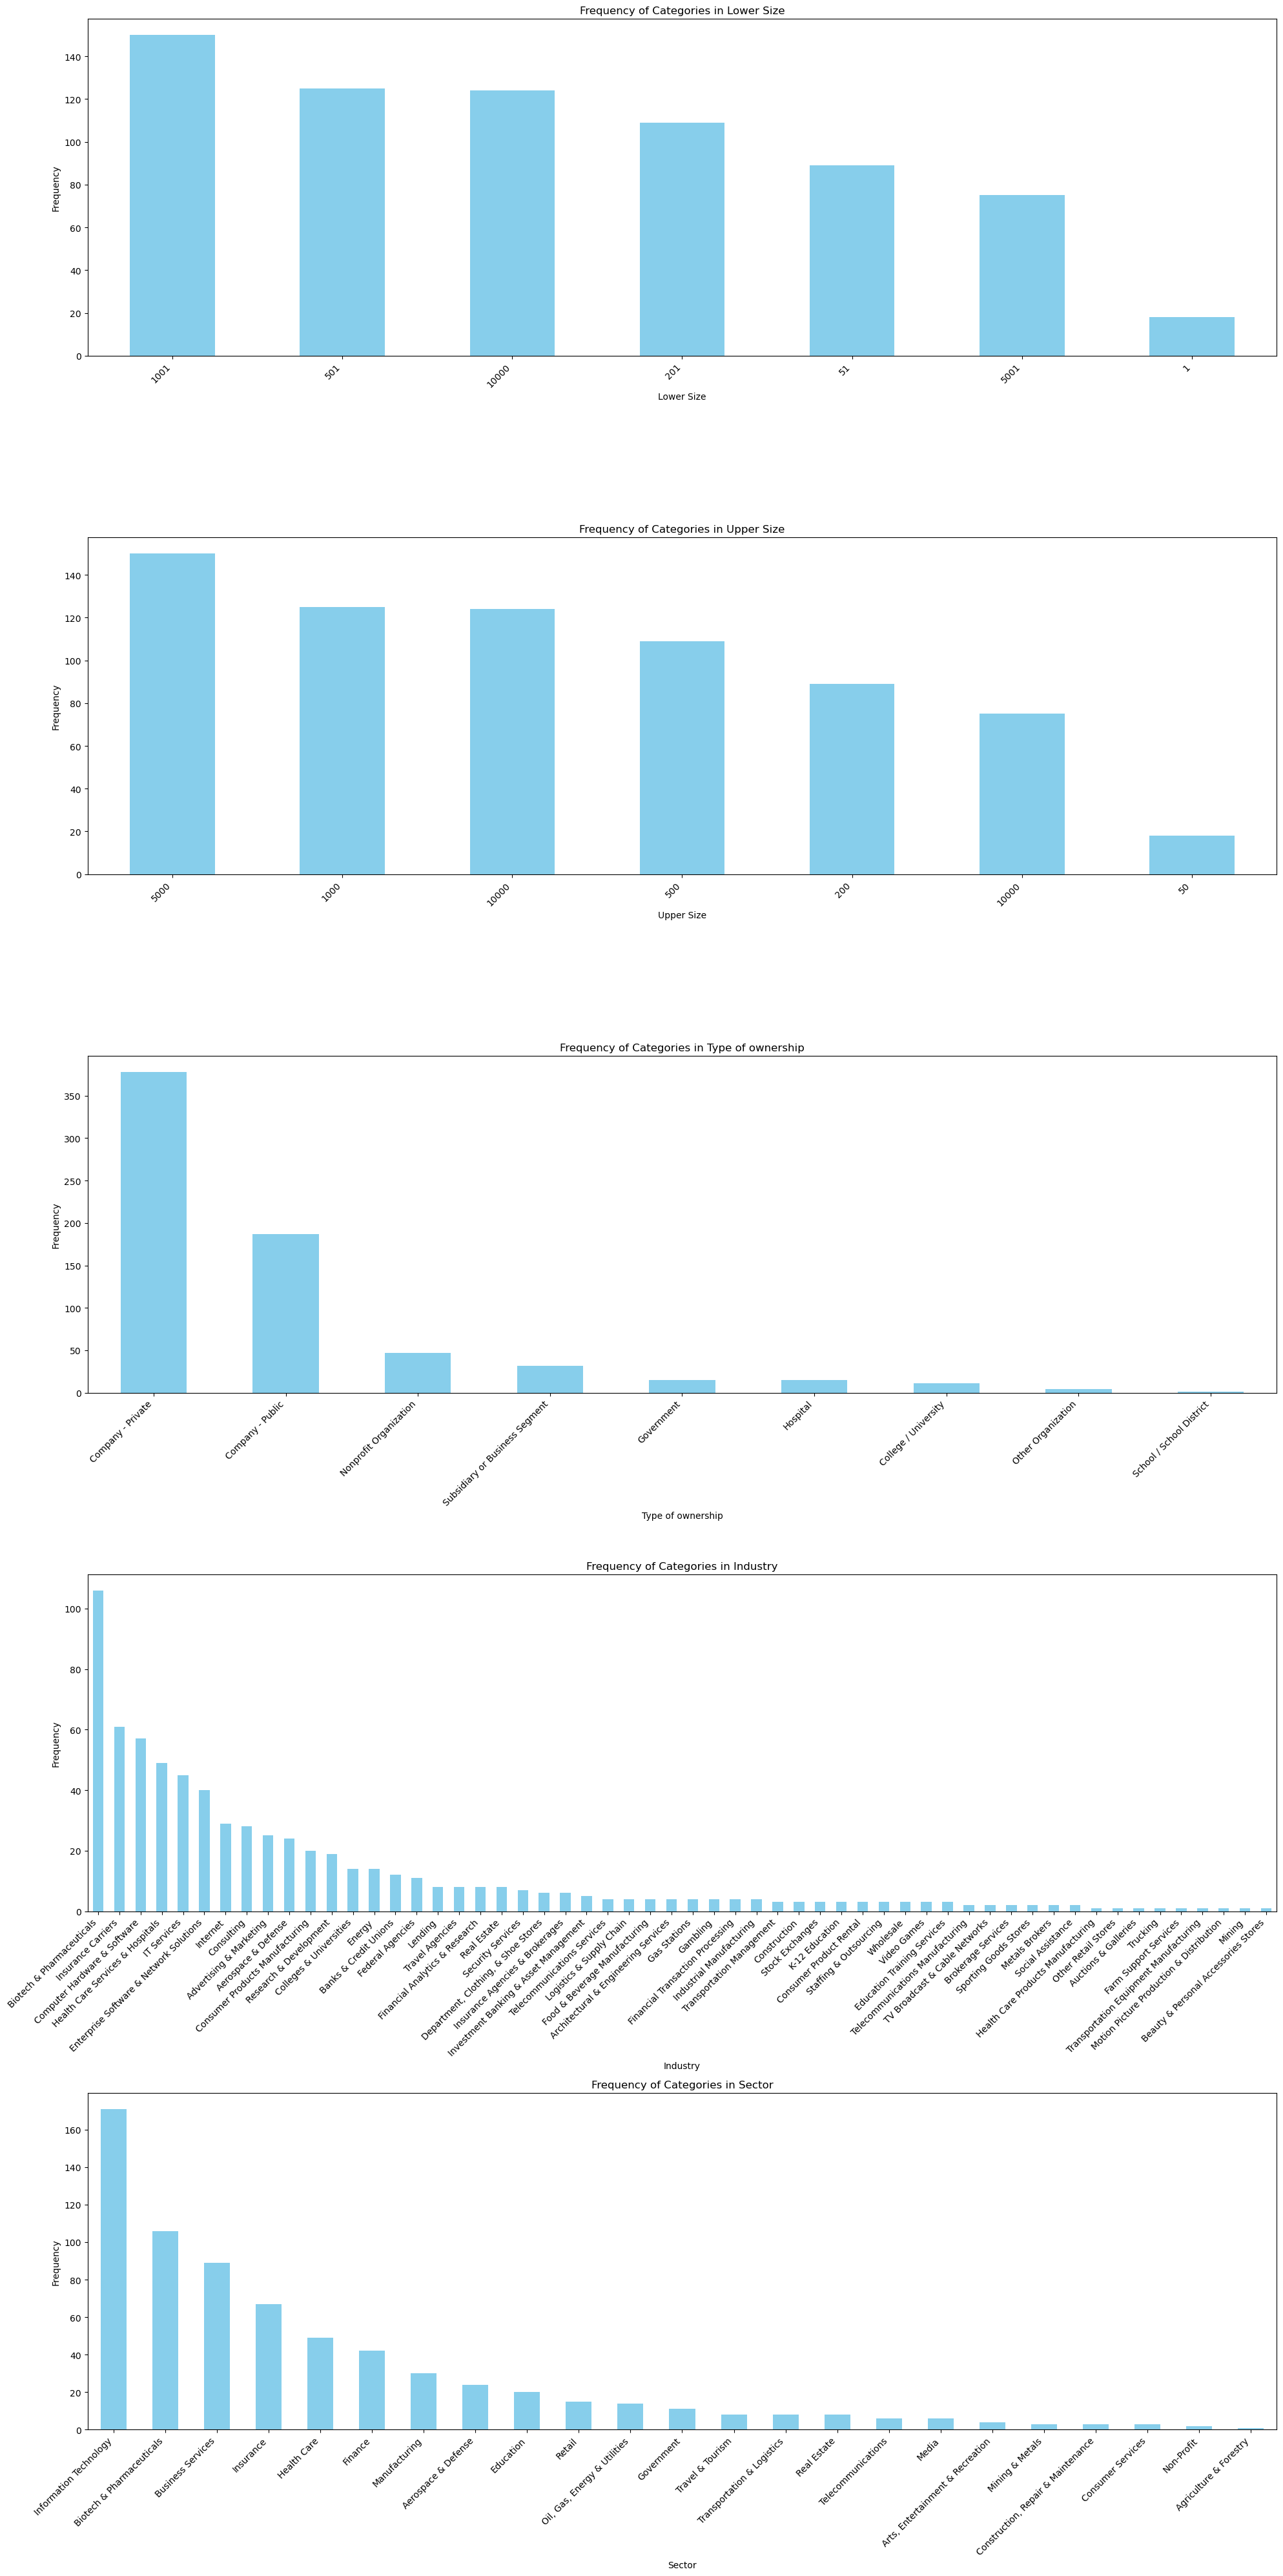

In [18]:

# Plot bar plots for categorical variables
plt.figure(figsize=(20, 40))

for i, (column, counts) in enumerate(category_counts.items(), 1):
    plt.subplot(len(category_counts), 1, i)
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of Categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<h1>Relationship between two numerical variables</h1>

We delve into the relationship between two numerical variables, 'Avg Salary' and 'Rating'. A scatter plot visualizes individual data points, revealing potential trends or clusters. To enhance this exploration, we incorporate marginal histograms that display the distribution of each variable on its own axis. This combination offers a multi-faceted view of the data, aiding in identifying patterns and potential correlations.

<Figure size 1000x800 with 0 Axes>

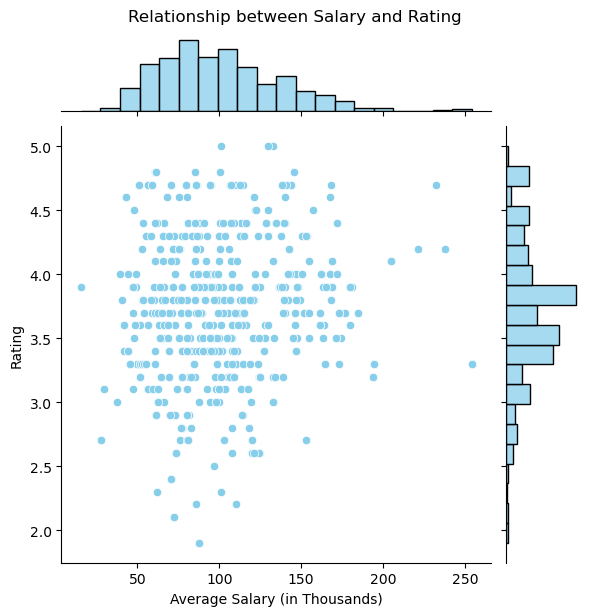

In [19]:
plt.figure(figsize=(10, 8))
sns.jointplot(x='Avg Salary(K)', y='Rating', data=df, kind='scatter', color='skyblue', marginal_kws=dict(bins=20, fill=True))
plt.xlabel('Average Salary (in Thousands)')
plt.ylabel('Rating')
plt.suptitle('Relationship between Salary and Rating', y=1.02)
plt.show()

<h1>Top Job Titles with Error Bars</h1>

Delving into job titles, we analyze their frequency to uncover the most common job roles represented in the data. Understanding job title distribution can reveal trends in job families, potential skills gaps, or even areas for recruitment focus. This analysis forms a crucial foundation for further exploration and decision-making.

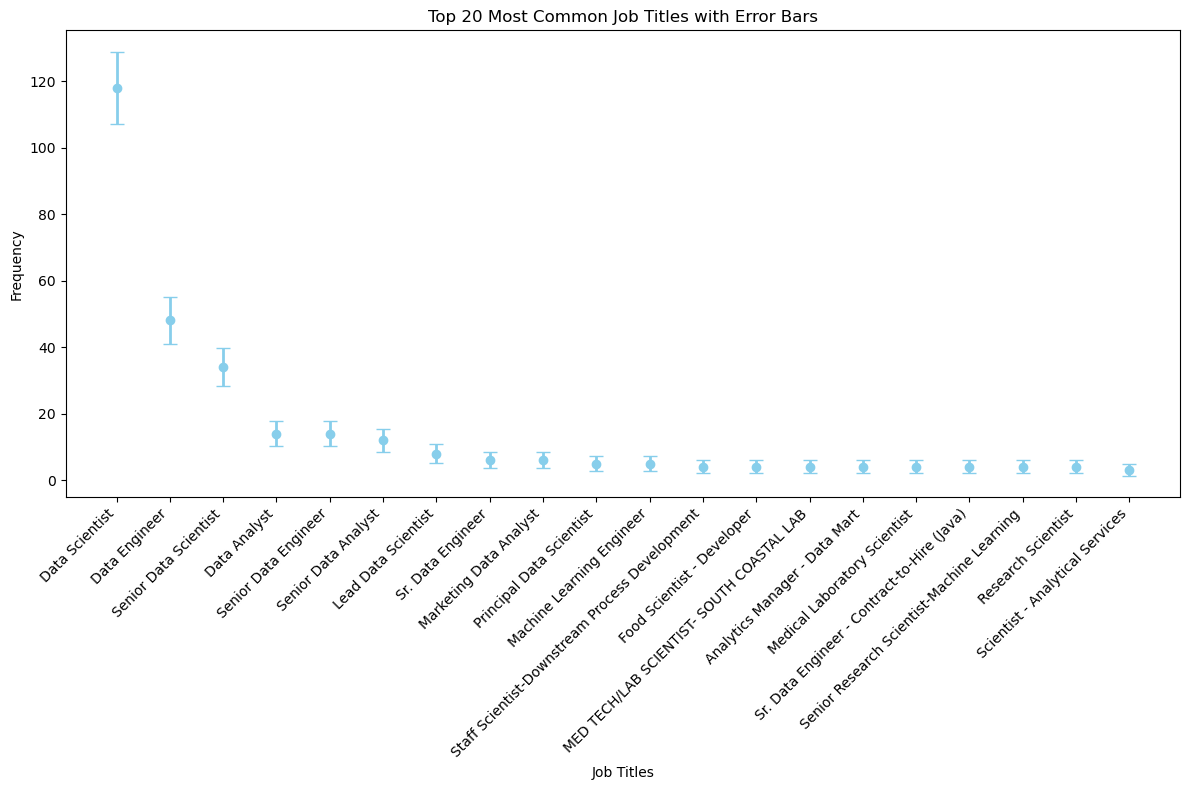

In [20]:
job_title_counts = df['Job Title'].value_counts()
top_job_titles = job_title_counts.head(20)
plt.figure(figsize=(12, 8))
plt.errorbar(x=top_job_titles.index, y=top_job_titles.values, yerr=np.sqrt(top_job_titles.values), fmt='o', color='skyblue', elinewidth=2, capsize=5)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Titles')
plt.ylabel('Frequency')
plt.title('Top 20 Most Common Job Titles with Error Bars')
plt.tight_layout()
plt.show()


<h1>Skill Frequency Analysis</h1>

Identifying the most prevalent skills can guide workforce planning, training initiatives, or even recruitment strategies. Using a horizontal bar chart, we create a compelling visual representation of skill frequencies, making it easier to grasp the skill landscape at a glance.

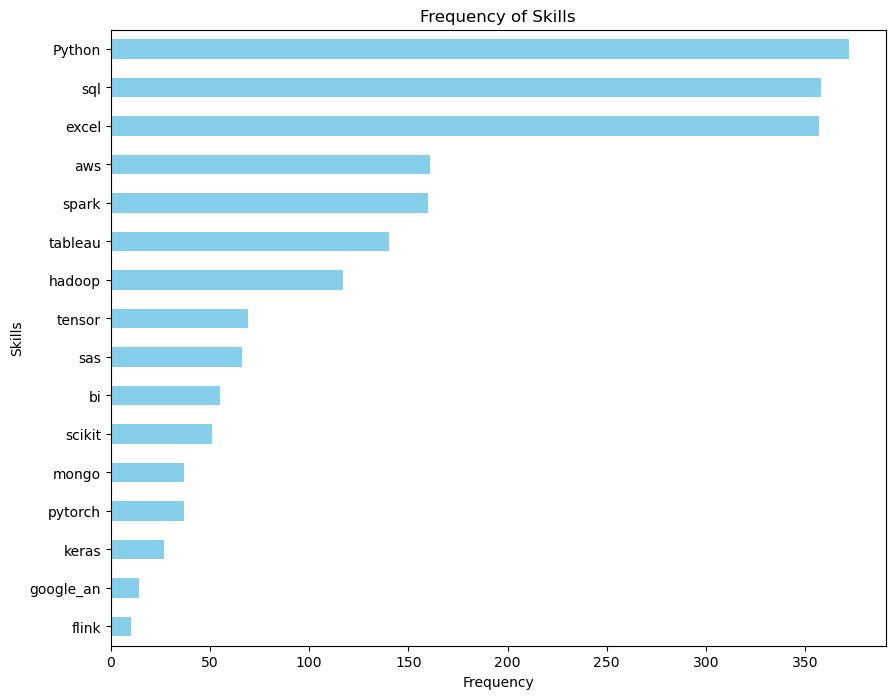

In [21]:

skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

skill_counts = df[skills_columns].sum()

skill_counts = skill_counts.sort_values(ascending=True )

plt.figure(figsize=(10, 8))
skill_counts.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Frequency of Skills')
plt.show()


## Now that we have established what we are working with and how it may yield useful insights, it is about time we dive deep into extracting insights from the given dataset.


---



# Amr228074 Work

## The `Bottom Up Approach` will be used to solve the first and third questions.

## `1- Which industry has the maximum correlation of the Top two mentioned skills in the data scientists job description?`


*   Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each indutstry?
*   Q1.2- Which industries show the highest correlation between the two highest-demand jobs?

## `2- Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?`

## `3- How do organizational characteristics, such as company age, and performance metrics, such as revenue and ratings, shape the talent demands for data scientists and influence the overall success of companies? `



*   Q3.1- Can we identify how the required skillset of `data scientists` changes based on company's Age?
*   Q3.2- How does the interplay between company revenue, rating, and age contribute to understanding the overall performance and reputation of a company?
*     Q3.2.1 How the rating of a company tend to increase or decrease with company's age?
*     Q3.2.2 Do companies with higher revenue tend to have higher or lower ratings compared to younger companies?





## Simple Overview About the Available Skills Within Different Industries

In [22]:
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
industry_column = ['Industry']
relevant_df = df[industry_column +skills_columns ] # creating relevant data frame of industries and skills.
relevant_df.head(10)

Industry  Python  spark  aws  excel  sql  sas  \
0               Aerospace & Defense       1      0    0      1    0    1   
1  Health Care Services & Hospitals       1      0    0      0    0    0   
2                 Security Services       1      1    0      1    1    1   
3                            Energy       1      0    0      0    0    0   
4           Advertising & Marketing       1      0    0      1    1    1   
5                       Real Estate       1      0    1      1    1    0   
6             Banks & Credit Unions       0      0    0      1    0    0   
7                        Consulting       1      1    1      1    1    0   
8  Health Care Services & Hospitals       0      0    0      0    0    0   
9                          Internet       1      1    0      0    0    0   

   keras  pytorch  scikit  tensor  hadoop  tableau  bi  flink  mongo  \
0      0        0       0       0       0        1   1      0      0   
1      0        0       0       0       0        0   0      0      0   
2      0        0       0       0       0        0   0      0      0   
3      0        0       0       0       0        0   0      0      0   
4      0        0       0       0       0        0   0      0      0   
5      0        0       0       0       0        0   1      0      1   
6      0        0       0       0       0        0   0      0      0   
7      0        1       0       1       0        0   0      0      0   
8      0        0       0       0       0        0   0      0      0   
9      0        0       0       0       0        0   0      0      0   

   google_an  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0

### Using the newly created data frame we will visualize the distribution of the skills across industries using heat map from Seaborn library to explore `specific` areas of the dataset with regard to skills in different industries.

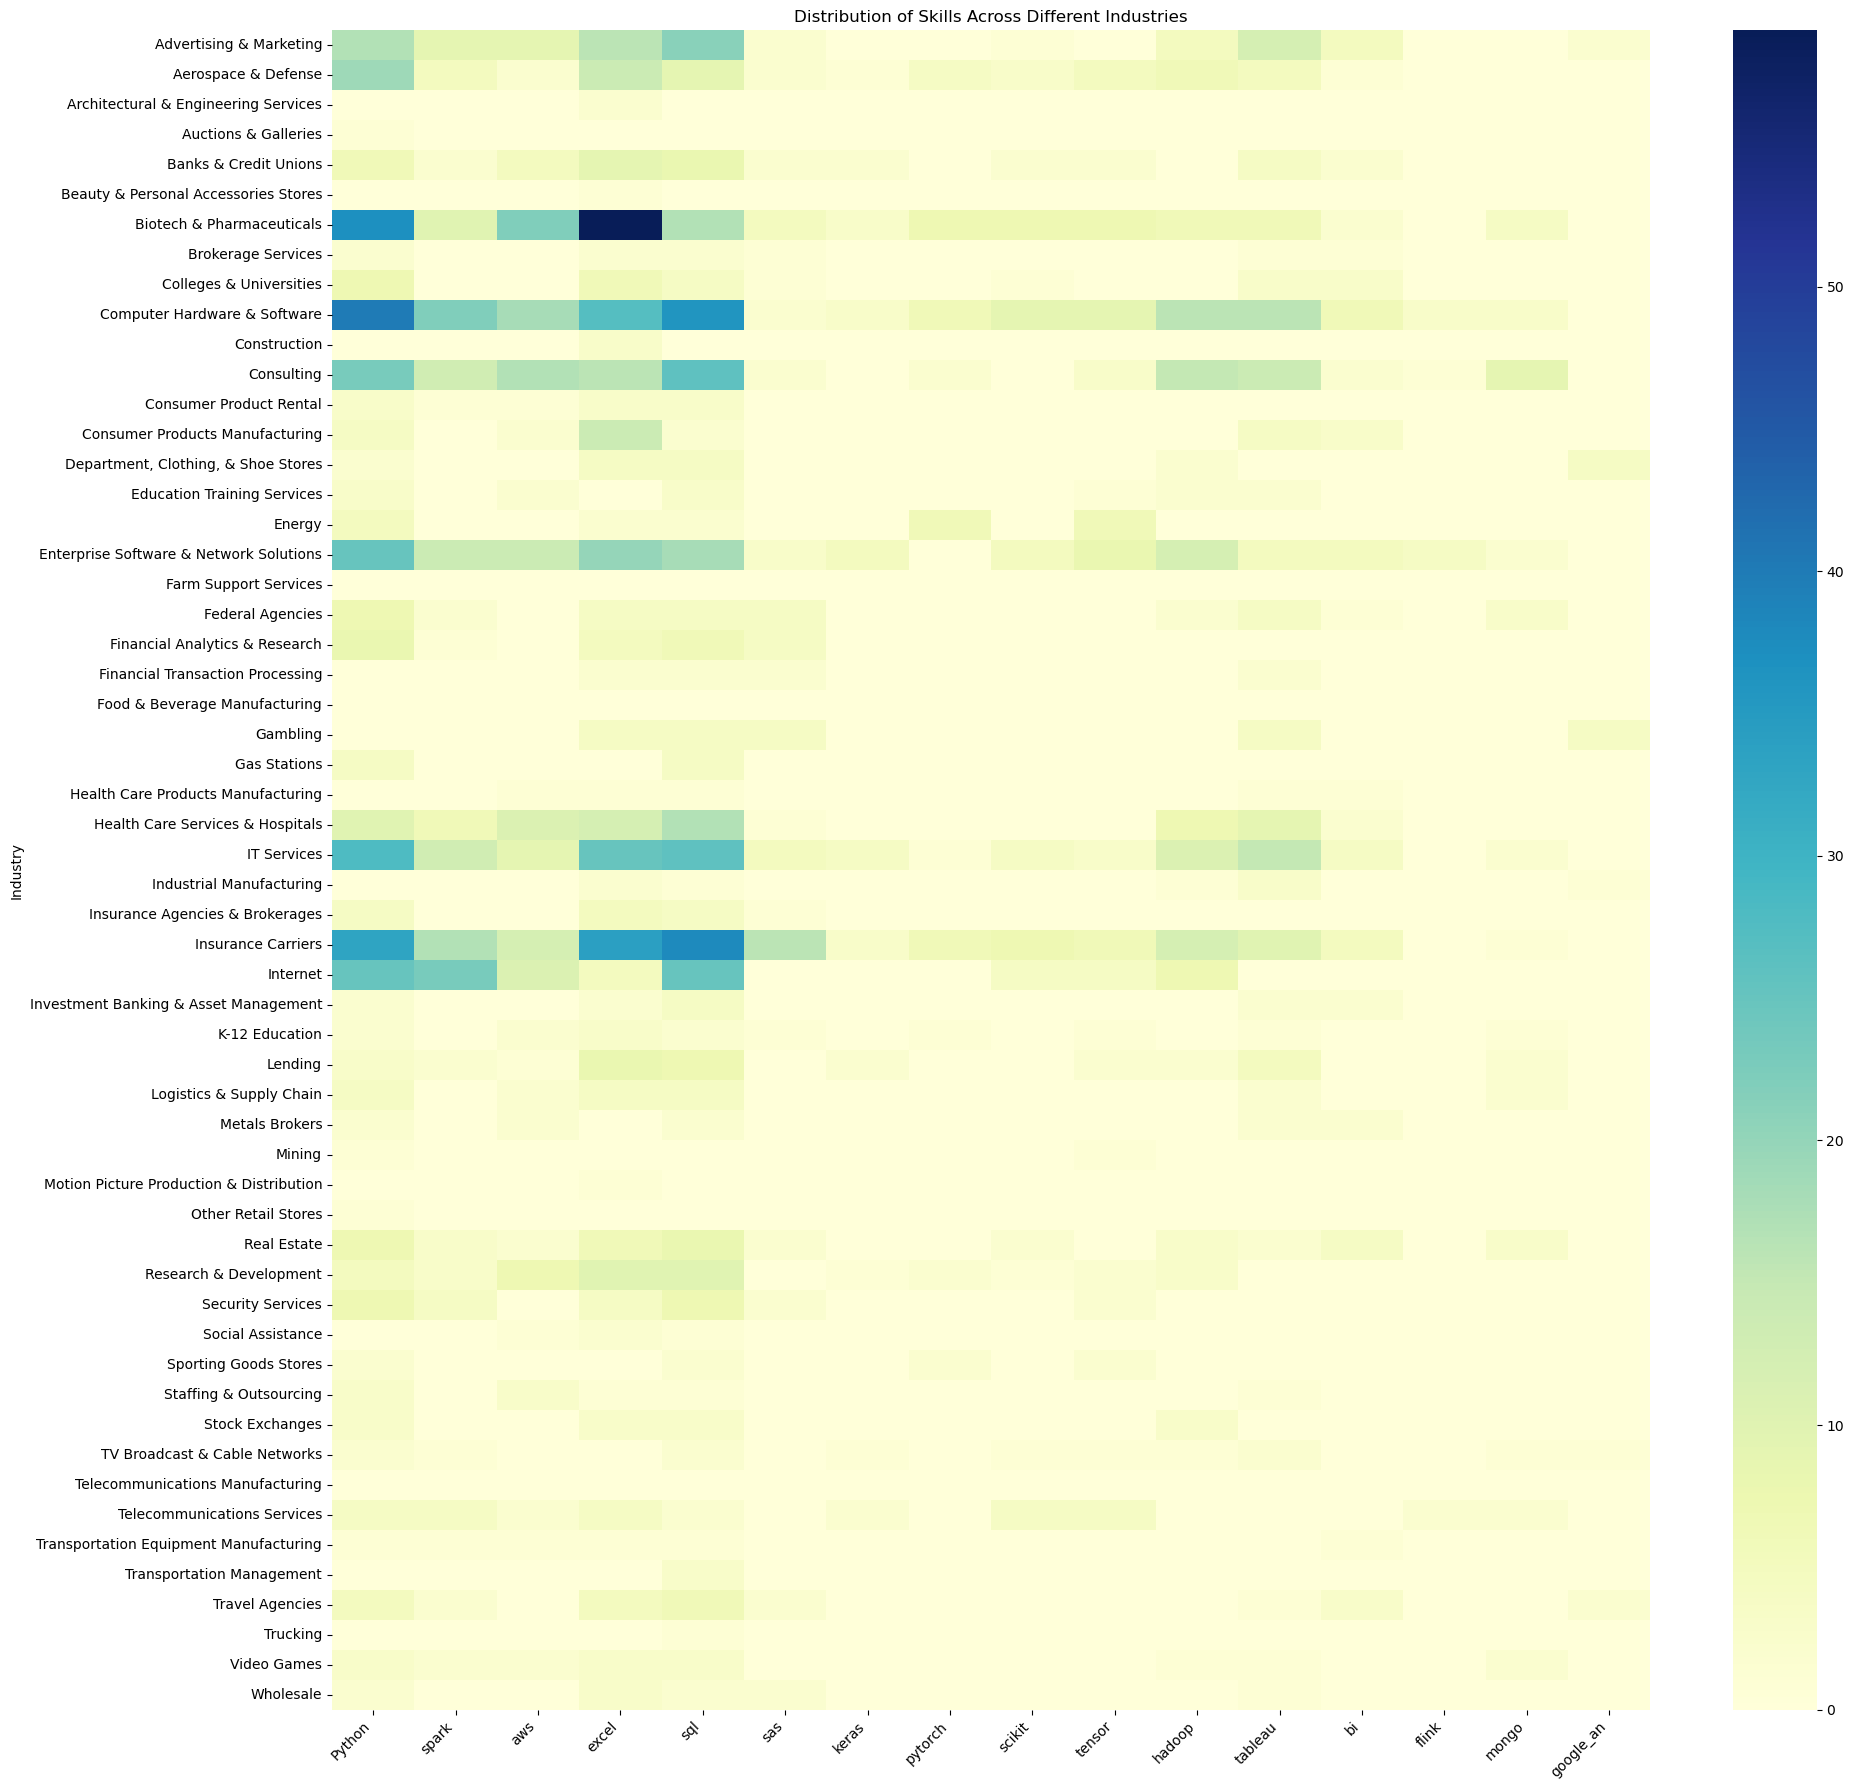

In [23]:
Grouped_df = relevant_df.groupby('Industry').sum()

annot_mask = Grouped_df.applymap(lambda x: '' if isinstance(x, (int, float)) else x)
plt.figure(figsize=(20, 18))
sns.heatmap(Grouped_df, annot=annot_mask, fmt='', cmap="YlGnBu")
plt.title('Distribution of Skills Across Different Industries')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### `Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each indutstry?`

#### We begin by extracting skills from the job descriptions that weren't explicity mentioned in the dataset.

In [24]:
##
print(df['Job Description'][80])
##

Nurx is looking for a Data Scientist who loves answering complex business and health questions through data. This is a rare opportunity to help build a data-driven culture from the ground up and impact the lives of millions by helping reinvent the healthcare system. We're building a system to support delivery of medical care in a modern and truly empathetic way.

This is a hybrid role in which you will run deep analyses on structured and unstructured data and also build and maintain ETLs to fetch data into the Nurx warehouse. You will be asked to work with your peers to determine the best algorithm to solve any given problem, and be able to create your own data structures to execute the solution.

On this team, you'll work closely with Product, Operations, Finance, Marketing and Engineering. You'll be reporting to the Head of Data & Research and will engage with all aspects of Nurx to discover insights on how to drive operational efficiency, help plan for staffing, and most importantly

### Extracting more required skills from the job description.

In [25]:
Skills__List = ['python', 'R', 'sql', 'excel', 'tableau', 'power bi', 'sas', 'spark', 'hadoop', 'java', 'scala', 'tensorflow', 'keras', 'pytorch', 'scikit-learn', 'pandas', 'numpy', 'matplotlib', 'seaborn', 'aws', 'azure', 'google cloud', 'big data', 'machine learning', 'deep learning', 'data mining', 'data analysis', 'data visualization', 'statistics', 'mathematics']
## This a list of the most common skills in the data science field.

# This function to count the demand for each skill in the job descriptions.
def Skills_Counter_(Description):
    Description = Description.lower()
    return Counter(Skill for Skill in Skills__List if Skill in Description)
## so this simply counts how many times the skill is mentioned in the job description.



In [26]:
# Applying Skills_Counter_ the function on job description column  then take sum.
skills_counter = df['Job Description'].apply(Skills_Counter_).sum()

# Convert skills_counter to a dataframe
Skills__df = pd.DataFrame(skills_counter.most_common(), columns=['Skill', 'Count'])
## most_common() method returns a list of the n most common elements and their counts
## from the most common to the least common skills

print(Skills__df)

                 Skill  Count
0               python    372
1                  sql    358
2                excel    357
3     machine learning    298
4           statistics    262
5        data analysis    190
6          mathematics    188
7                  aws    161
8                spark    160
9                 java    154
10               scala    148
11             tableau    140
12            big data    129
13              hadoop    117
14  data visualization    104
15                 sas     87
16         data mining     85
17          tensorflow     68
18       deep learning     60
19               azure     51
20        scikit-learn     43
21              pandas     40
22             pytorch     37
23            power bi     33
24               keras     27
25        google cloud     26
26               numpy     26
27          matplotlib     11
28             seaborn      2


In [27]:
Skill_Names = [Skill.capitalize() for Skill, Count in skills_counter.most_common()]
## using capitalize method to be in a stander form

Skill_Counts = [Count for Skill, Count in skills_counter.most_common()]

In [28]:
print(Skill_Names[0]) ## first mentioned skill from job description.
print(Skill_Counts[0])

Python
372


In [29]:
print(Skill_Names[1]) ## second mentioned skill from job description.
print(Skill_Counts[1])

Sql
358


In [30]:
First_Highest_Skill_Demand =Skill_Names[0]

In [31]:
Second_Highest_Skill_Demand =Skill_Names[1].lower()

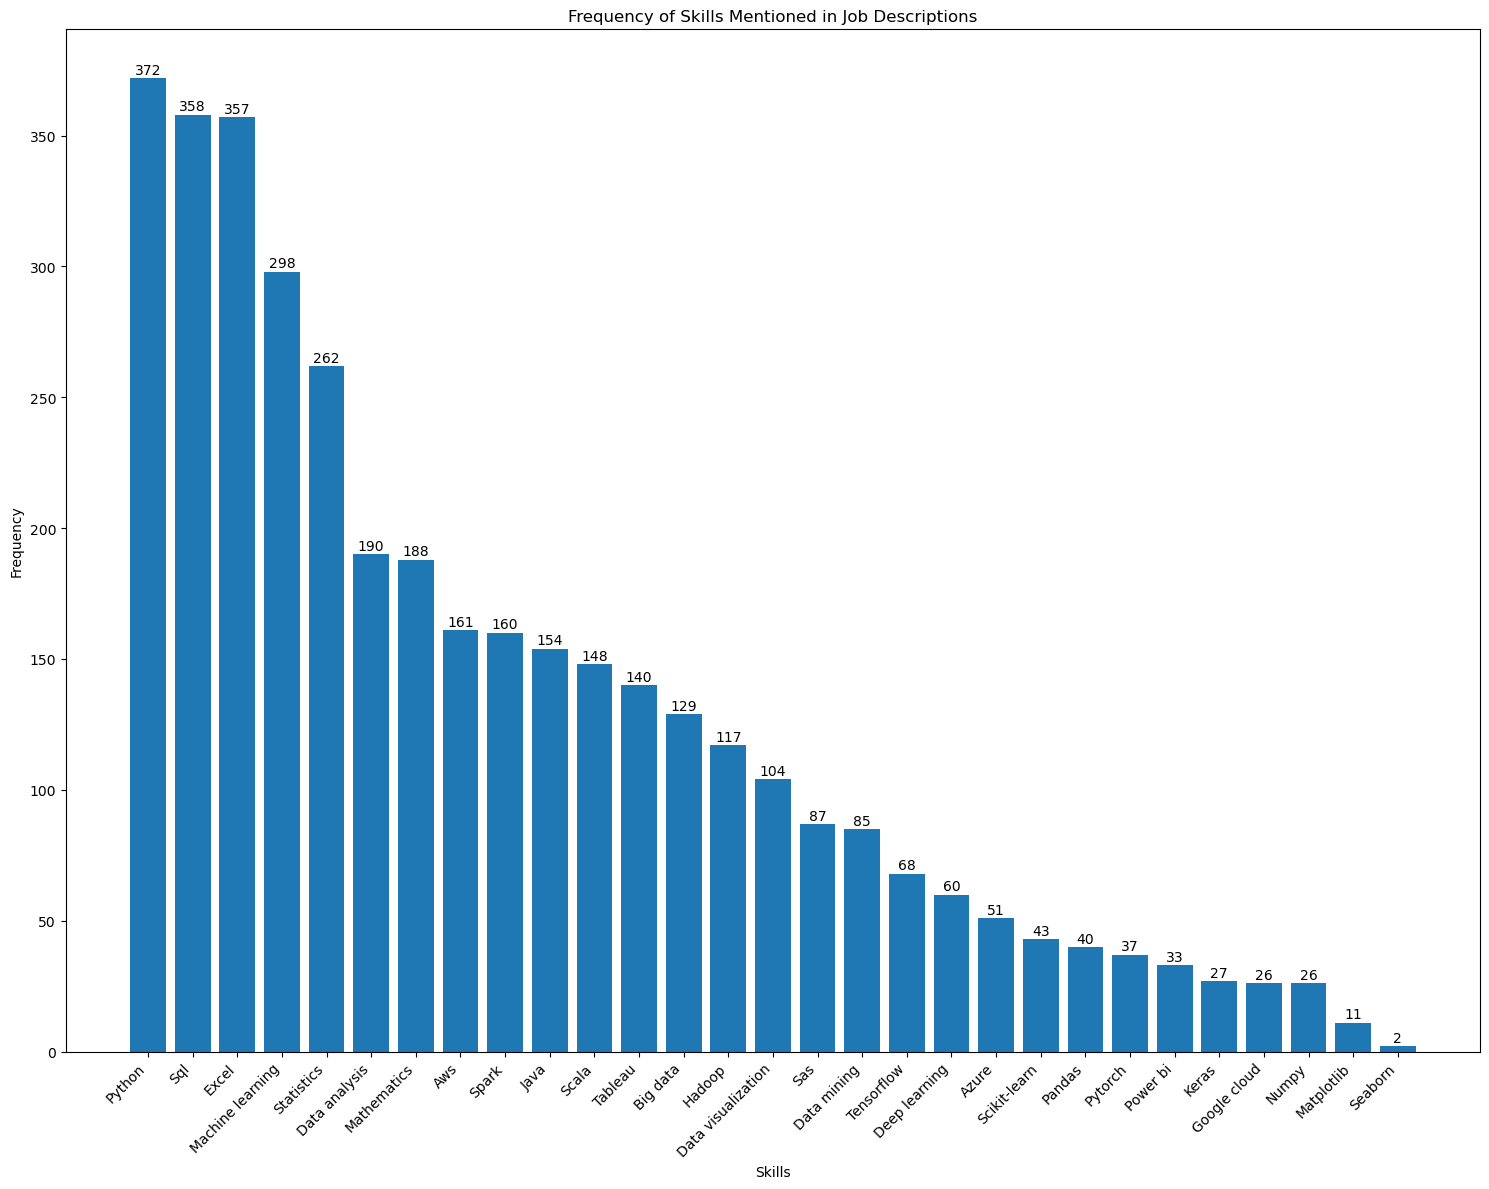

In [32]:
plt.figure(figsize=(15, 12))
plt.bar(Skill_Names, Skill_Counts)

# Adding frequency annotations to each bar
for i in range(len(Skill_Names)):
    plt.text(i, Skill_Counts[i] + 0.5, str(Skill_Counts[i]), ha='center', va='bottom', fontsize=10)

plt.xlabel('Skills')
plt.ylabel('Frequency')
plt.title('Frequency of Skills Mentioned in Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The previous visualization shows the frequency of skills mentioned in the job description. it shows that Python has the first highest demand with frequency = 372, then SQL the second highest demand with frequency = 358

In [33]:
def Specific_Skill_Across_industries(Skill):
    Skill_Demand = relevant_df.groupby('Industry')[Skill].sum().sort_values(ascending=False)

    percentages = (Skill_Demand.head(10) / Skill_Demand.head(10).sum()) * 100

    plt.figure(figsize=(15, 15))
    plt.pie(Skill_Demand.head(10), labels=[f'{label} ({percentage:.2f}%)' for label, percentage in zip(percentages.index, percentages)], startangle=140)
    plt.title(f"Demand for '{Skill.capitalize()}' Across Industries")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


This visualization delves into the industry-specific demand for the skill most frequently mentioned across various job descriptions. To achieve this, we bypass the intermediary string variable "First_Highest_Skill_Demand" and directly utilize the "Specific_Skill_Across_industries" variable constructed earlier. This streamlined approach allows us to present a clearer picture of how the demand for this dominant skill varies across different industry sectors.

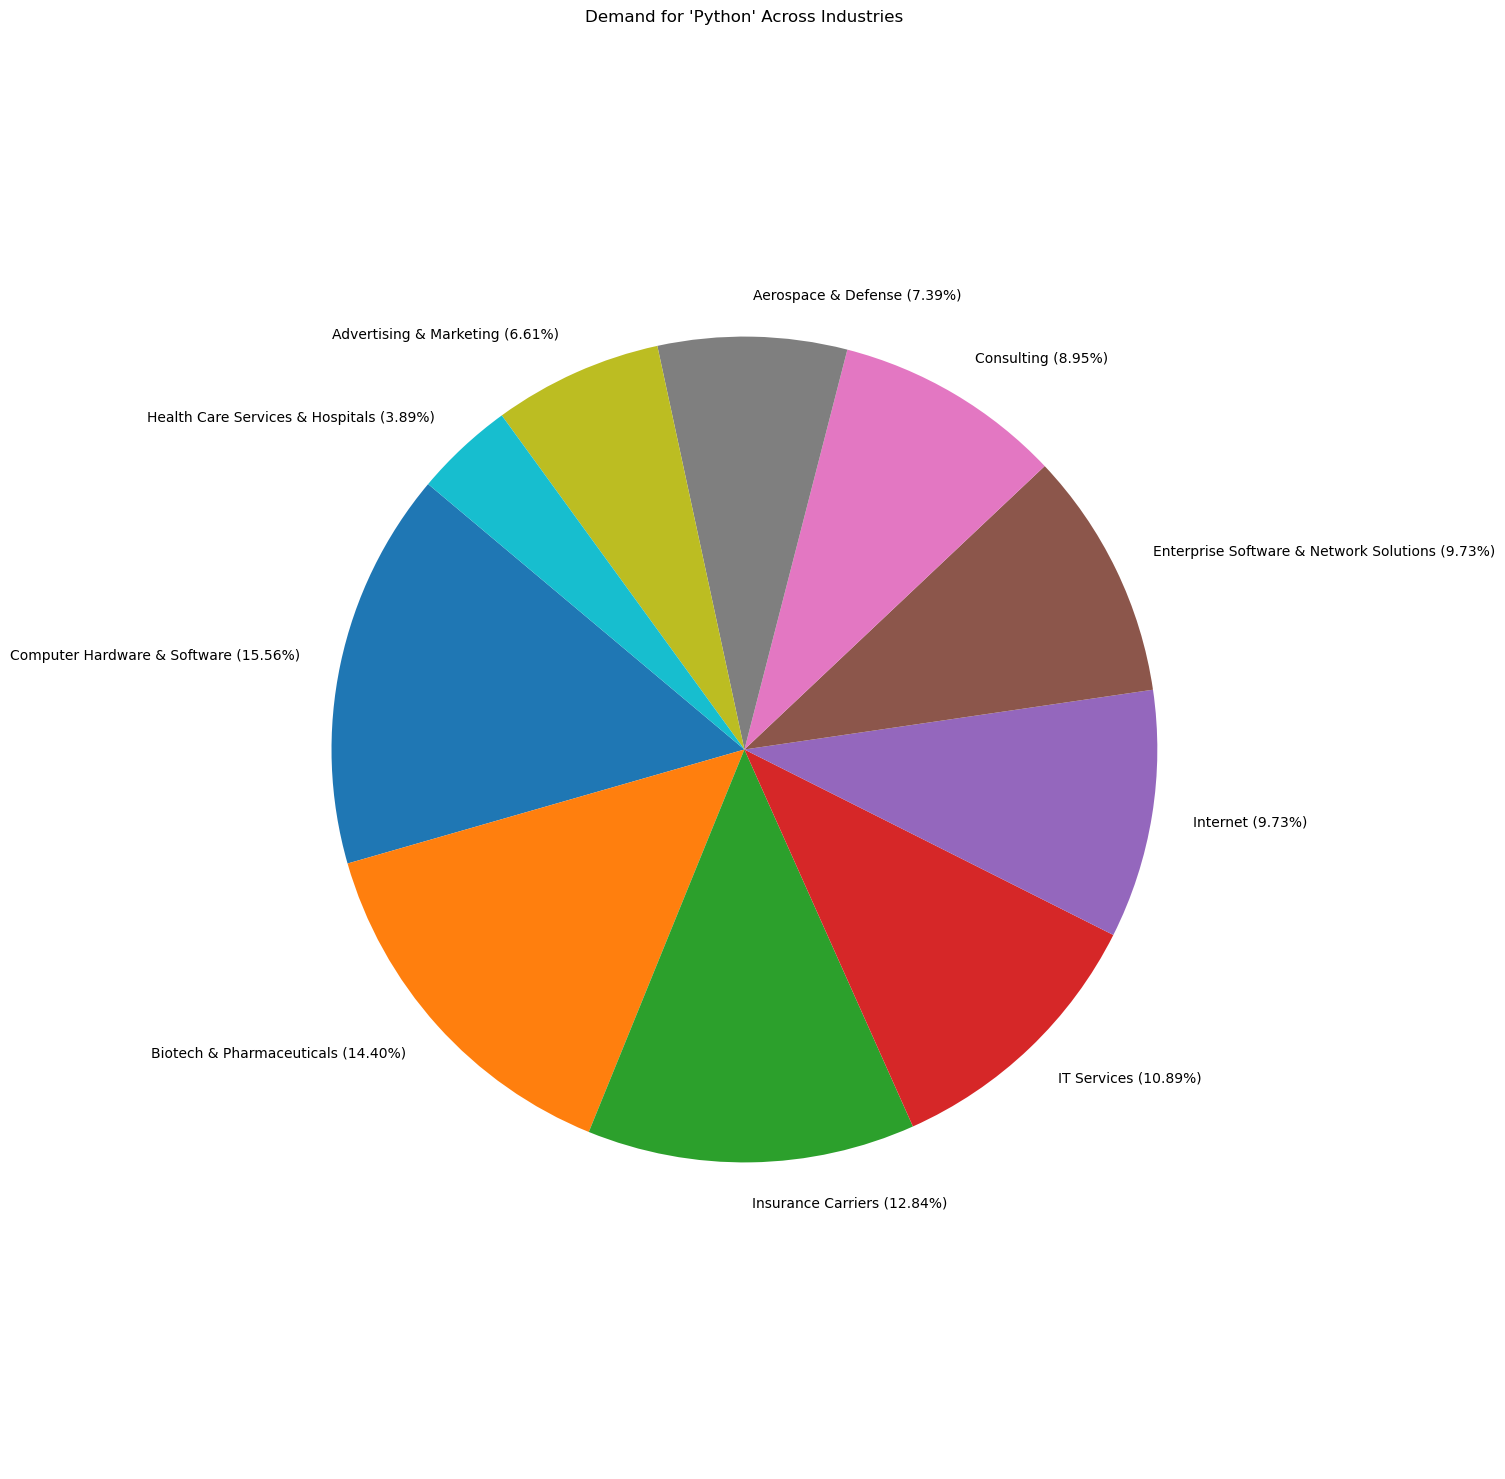

In [34]:
Specific_Skill_Across_industries(First_Highest_Skill_Demand)

### Q1.1 Answer
### `Racall Q1.1` Q1.1- Can we identify the most common (the highest demand) skills mentioned in the job description and where their demand for each industry?

### Answering Q1.1
The highest demand skill mentioned in the job description is Python with a frequency count = 372, making Python the highest demand skill with 15.56% of Python demand is in Computer Hardware and Software Industry

----------------------------------------------------

## `Q 1.2: Which industries show the highest correlation between the two highest-demand jobs?`

#### From the previous question(Q1.1) we know that the highest demand jobs is Python then SQL.

In [35]:

# calc the correlation matrix for Python and SQL  across industries.
Grouped__Data =  df.groupby( 'Industry')[[First_Highest_Skill_Demand, Second_Highest_Skill_Demand]].corr().unstack().iloc[:,1]
Grouped__Data = Grouped__Data.reset_index()

Grouped__Data = Grouped__Data[~Grouped__Data['Industry'].isin(['Insurance Agencies & Brokerages', 'Wholesale'])]
## Exclude those two Industries because their space is soo small.

Corr_between_two_skills = f'Correlation between {First_Highest_Skill_Demand} and {Second_Highest_Skill_Demand}'

Grouped__Data.columns =  ['Industry',  Corr_between_two_skills ]

Grouped__Data = Grouped__Data.drop(0) # brop it because it has no correlation with any skill anymore (it is useless).


# so the industries will be sorted by the correlation between Python and sql.
data_grouped_sorted =  Grouped__Data.sort_values ( by= Corr_between_two_skills, ascending=False)


data_grouped_sorted.head()

Industry  Correlation between Python and sql
4                 Banks & Credit Unions                            0.707107
13      Consumer Products Manufacturing                            0.666667
8               Colleges & Universities                            0.632456
19                     Federal Agencies                            0.571429
14  Department, Clothing, & Shoe Stores                            0.500000

In [36]:
data_grouped_sorted.reset_index(drop=True, inplace=True)
data_grouped_sorted.index += 1 ## adding 1 to the starting index to start from index 1 instead of starting with index 0
data_grouped_sorted.index.name = 'Ranking'
data_grouped_sorted.head()

Industry  \
Ranking                                        
1                      Banks & Credit Unions   
2            Consumer Products Manufacturing   
3                    Colleges & Universities   
4                           Federal Agencies   
5        Department, Clothing, & Shoe Stores   

         Correlation between Python and sql  
Ranking                                      
1                                  0.707107  
2                                  0.666667  
3                                  0.632456  
4                                  0.571429  
5                                  0.500000

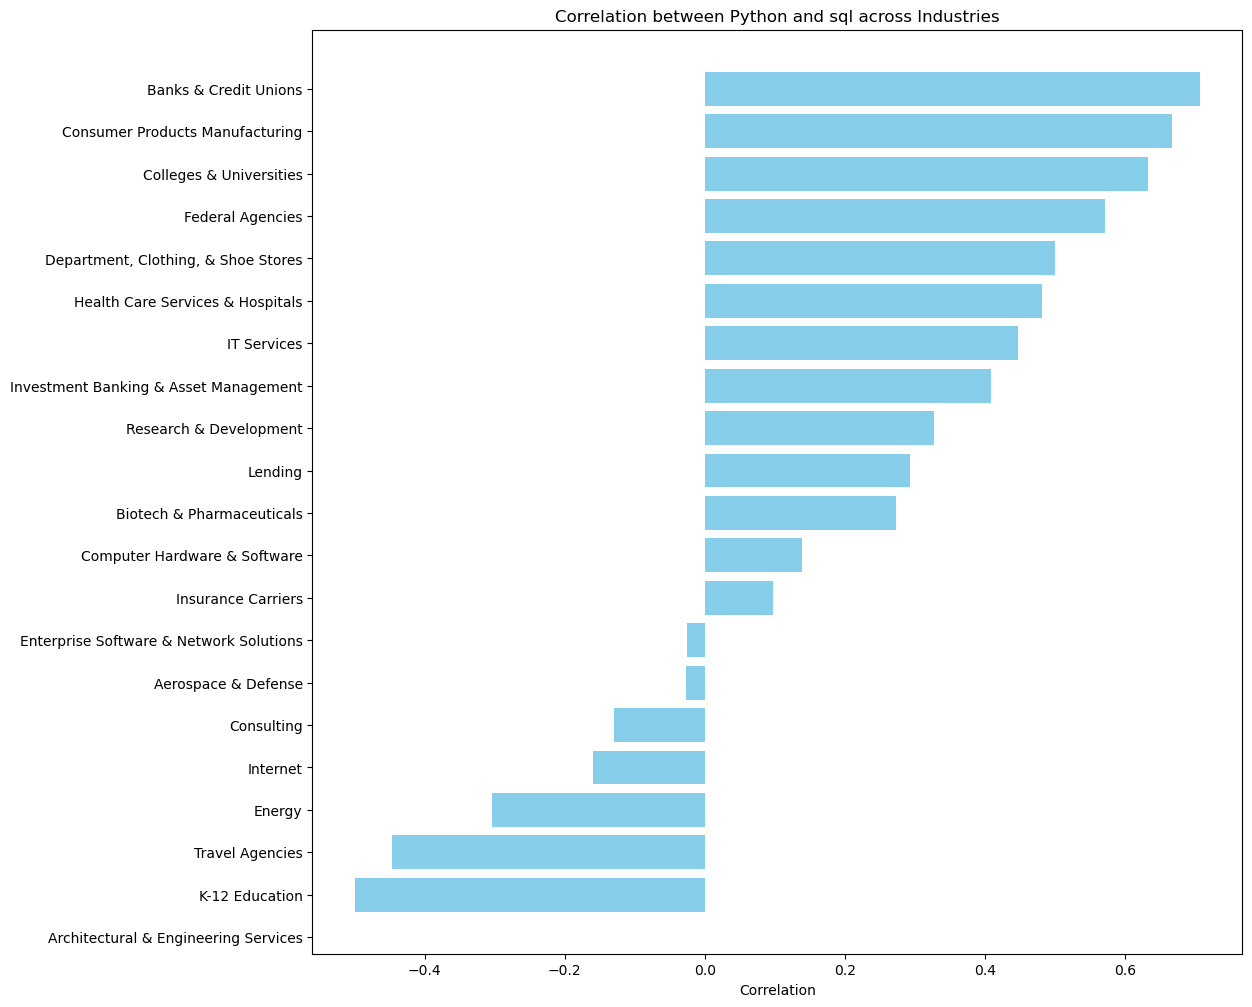

In [37]:
plt.figure(figsize=(12, 12))
plt.barh(data_grouped_sorted['Industry'], data_grouped_sorted[Corr_between_two_skills], color='skyblue')
plt.xlabel('Correlation')
plt.title(Corr_between_two_skills+ ' across Industries')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest correlation at the top
plt.show()

### Q1.2 Answer
### `Racall Q1.2` Q1.2-Which industries show the highest correlation between the two highest-demand jobs?

### Answering Q1.2:
The highest correlation between the two highest-demand jobs (Python and Sql) is in the Banks & Credit Unions industry with a positive correlation = 0.707.
Correlation = 0.707 between Python and SQL means that there is a perfect positive linear relationship between them. In other words, as one variable increases (Python or SQL), the other variable also increases proportionally

## Conclude The Final Answer To Question 1
Based on the analysis, we can conclude that Python is the most in-demand skill for data scientist jobs. The Computer Hardware and Software Industry shows the highest demand for Python. This suggests a strong reliance on this skill within technology-driven sectors.

Additionally, the Banks & Credit Unions industry demonstrates a very strong positive correlation between Python and SQL (correlation = 0.707). This indicates that as the demand for Python increases, the demand for SQL also increases proportionally within the Banks & Credit Unions industry.

----------------------------------------------------


## Q 2: Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?

#### To identify data-related skills, we will search for the keyword 'data' within the skill_counter created earlier and count it.

In [38]:
# Recall skills_counter that I was created in the above cells
skills_counter.items()

dict_items([('python', 372), ('excel', 357), ('tableau', 140), ('power bi', 33), ('sas', 87), ('machine learning', 298), ('data mining', 85), ('data analysis', 190), ('data visualization', 104), ('java', 154), ('statistics', 262), ('mathematics', 188), ('sql', 358), ('spark', 160), ('matplotlib', 11), ('big data', 129), ('deep learning', 60), ('aws', 161), ('azure', 51), ('tensorflow', 68), ('pytorch', 37), ('scala', 148), ('hadoop', 117), ('google cloud', 26), ('keras', 27), ('scikit-learn', 43), ('pandas', 40), ('numpy', 26), ('seaborn', 2)])

In [39]:
data_science_tools__mentionded_in_job__descriptions = [skill for skill in skills_counter.keys() if 'data' in skill]
data_science_tools__mentionded_in_job__descriptions

['data mining', 'data analysis', 'data visualization', 'big data']

#### We will now proceed to iterate through the skills_counter dictionary to identify the number of data science tools mentioned in the job descriptions.

In [40]:
## creating dectionary of key --> tool ,  value --> frequency
dic_of_too_and_tool_counts = {tool: skills_counter[tool] for tool in data_science_tools__mentionded_in_job__descriptions}


In [41]:
dic_of_too_and_tool_counts

{'data mining': 85,
 'data analysis': 190,
 'data visualization': 104,
 'big data': 129}

In [42]:
## Store tool names from dic_of_too_and_tool_counts in a list called 'tools'
## And store the count of each from dic_of_too_and_tool_counts in list called 'counts'
tools = list(dic_of_too_and_tool_counts.keys())
counts = list(dic_of_too_and_tool_counts.values())

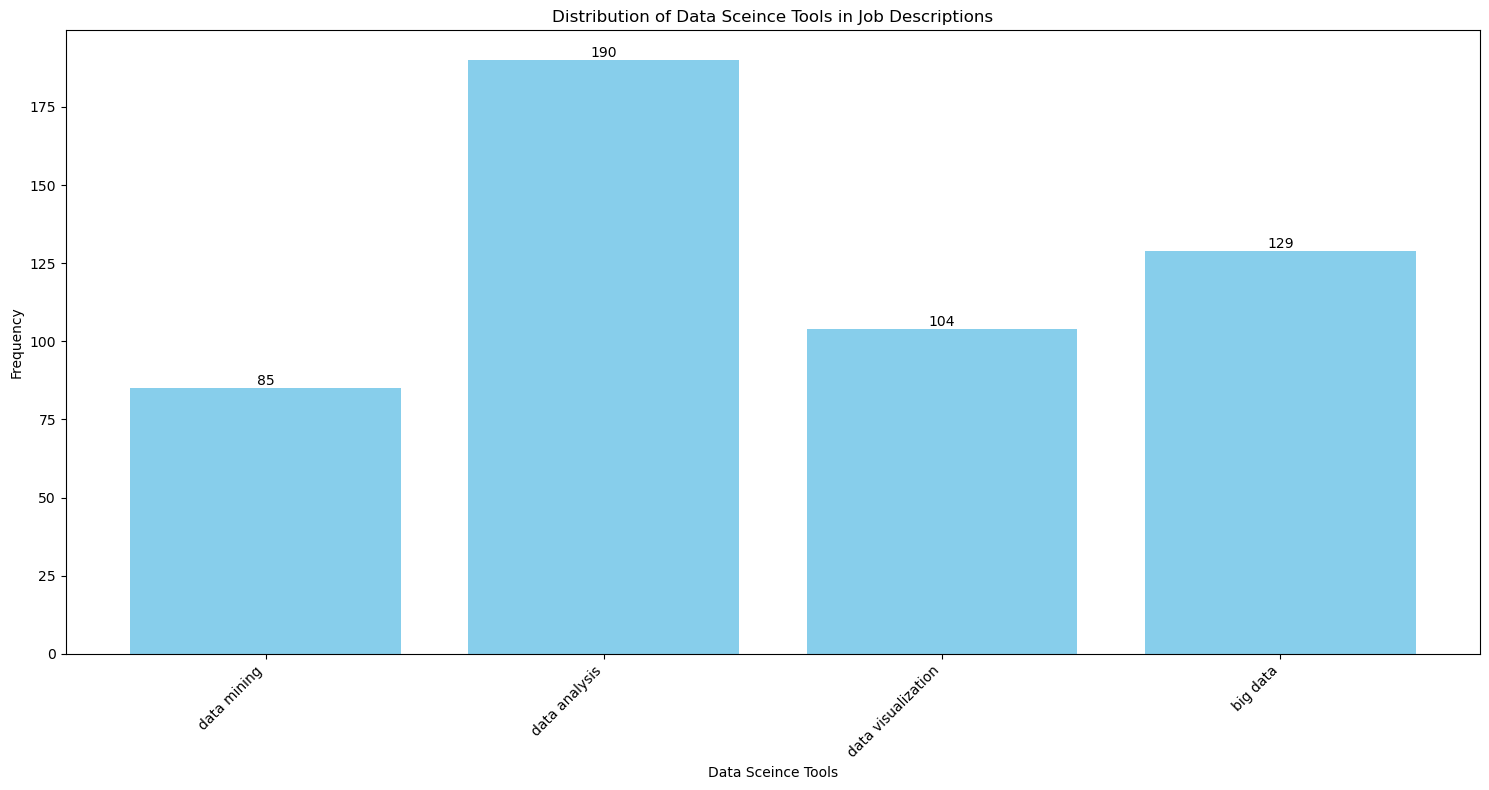

In [43]:
plt.figure(figsize=(15, 8))
bars = plt.bar(dic_of_too_and_tool_counts.keys(), dic_of_too_and_tool_counts.values(), color='skyblue')
plt.xlabel('Data Sceince Tools')
plt.ylabel('Frequency')
plt.title('Distribution of Data Sceince Tools in Job Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.show()

### `Racall Q2` Q2-Can we provide insights into the distribution of data science tools mentioned in the data set job descriptions?
### Answering Q2:
From the previous distribution, we notice that the highest data science tool mentioned in the job description is data analysis with mention frequency= 201, this reflects the importance of data analysis tool in data science domain.

--------------------------------------------------------------------------
-----------------------------------
-----------------------
--------------------------

## Q3- How do organizational characteristics, such as company age, and performance metrics, such as revenue and ratings, shape the talent demands for data scientists and influence the overall success of companies?

#### In order to answer Q3 I need first to answer it's sub questions first (Bottom Up Approach)

### Q3.1: Is there a Correlation Between Company Age and Required `Data Scientists` Skillset?

In [44]:
skills_columns = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

In [45]:
df['Number_of_Skills'] = df[skills_columns].sum(axis=1)

In [46]:
age_job_skills = df[['Age', 'Job Title', 'Number_of_Skills']]

In [47]:
age_job_skills.head()

Age                  Job Title  Number_of_Skills
0   48             Data Scientist                 5
1   37  Healthcare Data Scientist                 1
2   11             Data Scientist                 5
3   56             Data Scientist                 1
4   23             Data Scientist                 4

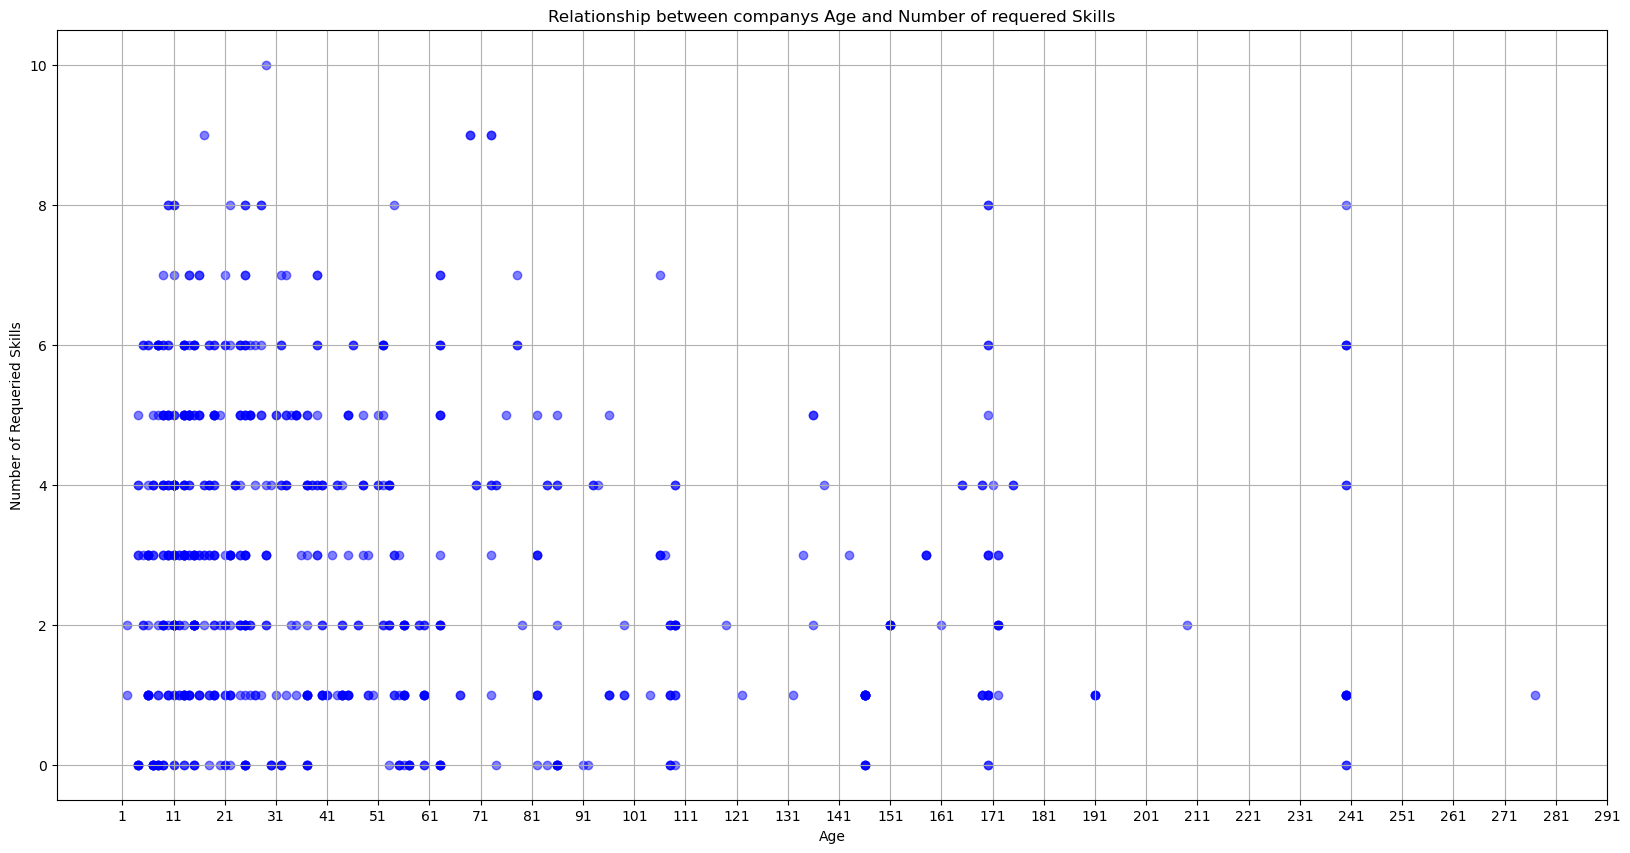

In [48]:
age_range = np.arange(1, 300, 10)  # Companies From 1 to 300 with intervals of 10 months for the company age.

plt.figure(figsize=(20, 10))
plt.scatter(age_job_skills['Age'], age_job_skills['Number_of_Skills'], color='blue', alpha=0.5)
plt.title('Relationship between companys Age and Number of requered Skills')
plt.xlabel('Age')
plt.ylabel('Number of Requeried Skills')
plt.xticks(age_range)
plt.grid(True)
plt.show()


### Q3.1 Answer
### `Racall Q3.1` Q3.1: Is there a Correlation Between Company Age and Required Data Scientists Skillset?
### Answering Q3.1:
Analysis suggests a trend where younger companies (startups) tend to require a broader range of skills from their data scientists compared to established companies. This could be attributed to budget constraints in startups, necessitating employees to wear multiple hats and maximize their value contribution. As companies mature and scale, their data science needs might evolve, potentially leading to a shift towards more specialized roles or deeper expertise in specific domains.


----------------------------------------------
--------------------------------------------

### Q3.2-Are company ratings influenced by other variables such as revenue or age?

In [49]:
## First take a look at how the company's revenues are represented in my data set.
df['Revenue']

0             $50 to $100 million (USD)
1                $2 to $5 billion (USD)
2            $100 to $500 million (USD)
3      $500 million to $1 billion (USD)
4              Unknown / Non-Applicable
                     ...               
736              $2 to $5 billion (USD)
737                  $10+ billion (USD)
738          $100 to $500 million (USD)
739            Unknown / Non-Applicable
741           $50 to $100 million (USD)
Name: Revenue, Length: 690, dtype: object

In [50]:
def extract_numeric_value(text):
    # Regular expression pattern to company's revenues represented in numeric values
    pattern = r'(\d+(\.\d+)?)(?=\s*(million|billion)?\s*\(USD\))'
    match = re.search(pattern, text, re.IGNORECASE)
    if match:
        return float(match.group(1))
    else:
        return None  # Or any other value indicating no match

In [51]:
def normalize_to_usd(value, unit):
    # Define conversion factors for different units to USD (Currency categories)
    conversion_factors = {
        'million': 1e6,
        'billion': 1e9
    }
    return value * conversion_factors.get(unit, 1) ##this return statement will return the company's revenues in USD

In [52]:
for revenue in df['Revenue']:
    numeric_value = extract_numeric_value(revenue)
    if numeric_value is not None:
        print("Extracted numeric value:", numeric_value)
        print("Normalized value in USD:", normalize_to_usd(numeric_value, 'million'))
    else:
        print("No numeric value found in:", revenue)

Extracted numeric value: 100.0
Normalized value in USD: 100000000.0
Extracted numeric value: 5.0
Normalized value in USD: 5000000.0
Extracted numeric value: 500.0
Normalized value in USD: 500000000.0
Extracted numeric value: 1.0
Normalized value in USD: 1000000.0
No numeric value found in: Unknown / Non-Applicable
Extracted numeric value: 2.0
Normalized value in USD: 2000000.0
No numeric value found in: Unknown / Non-Applicable
Extracted numeric value: 50.0
Normalized value in USD: 50000000.0
Extracted numeric value: 1.0
Normalized value in USD: 1000000.0
Extracted numeric value: 500.0
Normalized value in USD: 500000000.0
Extracted numeric value: 2.0
Normalized value in USD: 2000000.0
Extracted numeric value: 2.0
Normalized value in USD: 2000000.0
No numeric value found in: $10+ billion (USD)
No numeric value found in: Unknown / Non-Applicable
No numeric value found in: $10+ billion (USD)
No numeric value found in: Unknown / Non-Applicable
Extracted numeric value: 5.0
Normalized value 

In [53]:
revenue_list=[]
for revenue in df['Revenue']:
    numeric_value = extract_numeric_value(revenue)
    if numeric_value is not None:
       revenue_list.append ( normalize_to_usd(numeric_value, 'million'))
    else:
        revenue_list.append ( None)
revenue_list

[100000000.0,
 5000000.0,
 500000000.0,
 1000000.0,
 None,
 2000000.0,
 None,
 50000000.0,
 1000000.0,
 500000000.0,
 2000000.0,
 2000000.0,
 None,
 None,
 None,
 None,
 5000000.0,
 None,
 None,
 1000000.0,
 None,
 None,
 None,
 25000000.0,
 500000000.0,
 None,
 500000000.0,
 10000000.0,
 None,
 500000000.0,
 1000000.0,
 1000000.0,
 None,
 5000000.0,
 None,
 None,
 2000000.0,
 500000000.0,
 2000000.0,
 500000000.0,
 100000000.0,
 None,
 5000000.0,
 5000000.0,
 None,
 5000000.0,
 500000000.0,
 None,
 None,
 None,
 500000000.0,
 None,
 None,
 2000000.0,
 None,
 None,
 None,
 2000000.0,
 None,
 25000000.0,
 100000000.0,
 1000000.0,
 10000000.0,
 5000000.0,
 50000000.0,
 500000000.0,
 None,
 None,
 None,
 100000000.0,
 500000000.0,
 2000000.0,
 None,
 None,
 25000000.0,
 2000000.0,
 1000000.0,
 5000000.0,
 50000000.0,
 2000000.0,
 25000000.0,
 100000000.0,
 500000000.0,
 None,
 50000000.0,
 500000000.0,
 50000000.0,
 None,
 500000000.0,
 2000000.0,
 25000000.0,
 500000000.0,
 None,
 200000

In [54]:
companies_df=df

In [55]:
companies_df['Revenu As numeric value']=revenue_list
companies_df = companies_df.dropna(subset=['Revenu As numeric value'])
companies_df[['Company Name','Revenu As numeric value']]

Company Name  Revenu As numeric value
0                        Tecolote Research              100000000.0
1    University of Maryland Medical System                5000000.0
2                                  KnowBe4              500000000.0
3                                     PNNL                1000000.0
5                                 CyrusOne                2000000.0
..                                     ...                      ...
731                      Arbella Insurance              500000000.0
735                              Fivestars              500000000.0
736                                  IQVIA                5000000.0
738                             Eventbrite              500000000.0
741           Riverside Research Institute              100000000.0

[386 rows x 2 columns]

In [56]:
companies_df = df[df['Age'] <= 250]
## This will remove the row of any Age value greater that 200.

In [57]:
companies_df['Age'].max()

240

### Q3.2.1 How the rating of a company tend to increase or decrease with company's age?

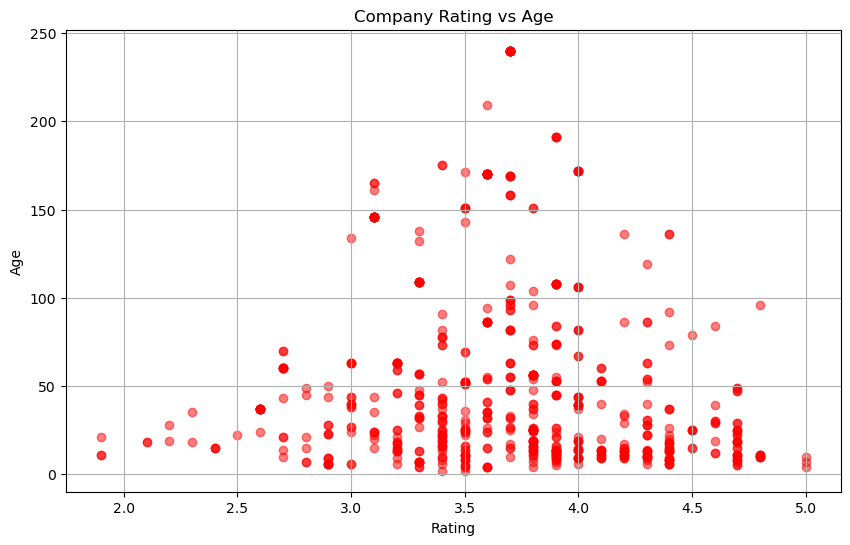

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(companies_df['Rating'], companies_df['Age'], color='red', alpha=0.5)
plt.title('Company Rating vs Age')
plt.xlabel('Rating')
plt.ylabel('Age')
plt.grid(True)
plt.show()

This visualization shows that companies with smaller ages have a good chance of having high ratings, so that means that the increase in company age didn't lead to high company rates.

---------------------------

### Q3.2.2 How companies with higher revenue tend to have higher or lower ratings compared to younger companies?

In [59]:
def plot_3d_scatter(elevation, azimuth): ## Evalution and Azumuth is angles for adjusting
                                         ## the the viewing of 3D plot.

    companies_df_million = companies_df.copy()
    ## Without using .copy method we will have error,because this means
    ## that we are creating a reference to the original dataFrame.

    companies_df_million['Revenu As numeric value'] /= 1000000
    # Convert revenue to millions to fit screen dimensions.

    companies_df_million = companies_df_million.sort_values(by='Revenu As numeric value')  # Sort by revenue


    fig = plt.figure(figsize=(25, 10))
    ax = fig.add_subplot(111, projection='3d')
    ## NOw creating new figure and 3d subplot.

    scatter = ax.scatter(companies_df_million['Rating'], companies_df_million['Age'], range(len(companies_df_million)), c=companies_df_million['Revenu As numeric value'], cmap='viridis', alpha=0.5)
    # Creating Scatter plot withing the 3D subplot that was created above
    ## and set setting all method parameters such as cmap(color map), alpha(points transparency),....etc

    cbar = plt.colorbar(scatter)
    cbar.set_label('Revenue (Million)')
    ## Set the color bar Revenue column.

    #####
    ax.set_xlabel('Rating')
    ax.set_ylabel('Age')
    ax.set_zlabel('Total Revenue')
    ax.set_title('Company Rating vs Age vs Revenue (Million)')

    ax.view_init(elevation, azimuth)
    ## This line sets the viewpoint of the 3D plot
    ### based on the elevation(high) and azimuth angles provided as arguments.

    plt.show()




In [60]:

interactive_plot = interactive(plot_3d_scatter,
                               elevation=widgets.IntSlider(min=0, max=180, step=1, value=19),
                               azimuth=widgets.IntSlider(min=0, max=360, step=1, value=30))## Now this line creates an interactive widget using an interactive function, after that we
## Assign to plot_3d_scatter function with the interactive plot.

In [61]:
interactive_plot

interactive(children=(IntSlider(value=19, description='elevation', max=180), IntSlider(value=30, description='…

This visualization presents the distribution of revenue across company age demographics. While there appears to be a concentration of yellow data points (potentially representing higher revenue) in the younger company area, a more comprehensive analysis is necessary to draw definitive conclusions about the relationship between company age and revenue.

## Conclude The Final Answer Of Question 3:
Organizational traits, such, as the age of a company play a role in shaping the number of requirements for data scientists. Startups often prioritize a range of skills due to constraints while `established companies may lean towards more specialized roles or expertise in specific domains as they progress`. Moreover analyzing the correlation focuses on the link between company ratings and performance metrics. `Although there is a correlation between ratings and revenue suggesting a possible connection between higher ratings and increased revenue older companies tend to have lower ratings compared to younger ones`.


---




# Loay222929 Work

<h2> Answering Q4</h2>

**Q4: Can we identify any correlations between specific educational backgrounds and the acquisition of in-demand skills based on the job descriptions they qualify for?**

- Columns would be used: {Degree, (the skills columns)}, Job Descriptions}

- Grouping data based on “degree” (educational background), you can look at the common skills in the job description for each “degree”.
Identify skills that are not there in different degrees, those skills can be considered skills acquired in different “degrees” {bachelor, masters, doctoral}

- Graphs (Frequency tables, bar charts, heatmaps)

Mapping Skills to Educational Degrees:

In [62]:
# df['Job Description'].str.contains(r".*Master(?i).* | .*Bachelor(?i).*")
filtered_df = df[df['Job Description'].str.contains(r'\bMaster.* | \bmaster.* | \bBachelor.* | \bbachelor.*', re.I)]
filtered_df

index                                     Job Title  \
0        0                                Data Scientist   
1        1                     Healthcare Data Scientist   
2        2                                Data Scientist   
7        7                                Data Scientist   
12      12             Staff Data Scientist - Technology   
..     ...                                           ...   
731    944                         IT - Data Engineer II   
734    947                  Data Science Project Manager   
736    949  Principal, Data Science - Advanced Analytics   
737    950      Sr Scientist, Immuno-Oncology - Oncology   
741    955     Research Scientist – Security and Privacy   

                                       Job Description  Rating  \
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
7    Advanced Analytics – Lead Data Scientist\nOver...     3.8   
12   Position Summary...\nDrives the execution of m...     3.2   
..                                                 ...     ...   
731  IT - Data Engineer II\n\nThe Data Engineer II ...     3.4   
734  At MassMutual, we are passionate about helping...     3.6   
736  IQVIA is the leading human data science compan...     3.6   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
741  Returning Candidate? Log back in to the Career...     3.6   

                              Company Name Job City Location  \
0                        Tecolote Research       Albuquerque   
1    University of Maryland Medical System         Linthicum   
2                                  KnowBe4        Clearwater   
7                               Logic20/20          San Jose   
12                                 Walmart             Plano   
..                                     ...               ...   
731                      Arbella Insurance            Quincy   
734                             MassMutual            Boston   
736                                  IQVIA  Plymouth Meeting   
737                                    GSK         Cambridge   
741           Riverside Research Institute       Beavercreek   

                  Headquarters Lower Size Upper Size  Founded  \
0                   Goleta, CA        501       1000     1973   
1                Baltimore, MD      10000      10000     1984   
2               Clearwater, FL        501       1000     2010   
7                  Seattle, WA        201        500     2005   
12             Bentonville, AR      10000      10000     1962   
..                         ...        ...        ...      ...   
731                 Quincy, MA       1001       5000     1988   
734            Springfield, MA       5001      10000     1851   
736                 Durham, NC      10000      10000     2017   
737  Brentford, United Kingdom      10000      10000     1830   
741              Arlington, VA        501       1000     1967   

          Type of ownership                             Industry  \
0         Company - Private                  Aerospace & Defense   
1        Other Organization     Health Care Services & Hospitals   
2         Company - Private                    Security Services   
7         Company - Private                           Consulting   
12         Company - Public  Department, Clothing, & Shoe Stores   
..                      ...                                  ...   
731       Company - Private                   Insurance Carriers   
734       Company - Private                   Insurance Carriers   
736        Company - Public            Biotech & Pharmaceuticals   
737        Company - Public            Biotech & Pharmaceuticals   
741  Nonprofit Organization                     Federal Agencies   

                        Sector                     Revenue  Competitors  \
0          Aerospace & Defense   $50 to $100 mill

In [63]:
def assign_degree_level(text):
  if re.search(r'\bMaster.* | \bmaster.*', text):
    return "Master"
  elif re.search(r'\bBachelor.* | \bbachelor.*', text):
    return "Bachelor"
  else:
    return None

# Apply the function to the 'Job Description' column
filtered_df['Degree Level'] = filtered_df['Job Description'].apply(assign_degree_level)
filtered_df


index                                     Job Title  \
0        0                                Data Scientist   
1        1                     Healthcare Data Scientist   
2        2                                Data Scientist   
7        7                                Data Scientist   
12      12             Staff Data Scientist - Technology   
..     ...                                           ...   
731    944                         IT - Data Engineer II   
734    947                  Data Science Project Manager   
736    949  Principal, Data Science - Advanced Analytics   
737    950      Sr Scientist, Immuno-Oncology - Oncology   
741    955     Research Scientist – Security and Privacy   

                                       Job Description  Rating  \
0    Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1    What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2    KnowBe4, Inc. is a high growth information sec...     4.8   
7    Advanced Analytics – Lead Data Scientist\nOver...     3.8   
12   Position Summary...\nDrives the execution of m...     3.2   
..                                                 ...     ...   
731  IT - Data Engineer II\n\nThe Data Engineer II ...     3.4   
734  At MassMutual, we are passionate about helping...     3.6   
736  IQVIA is the leading human data science compan...     3.6   
737  Site Name: USA - Massachusetts - Cambridge\nPo...     3.9   
741  Returning Candidate? Log back in to the Career...     3.6   

                              Company Name Job City Location  \
0                        Tecolote Research       Albuquerque   
1    University of Maryland Medical System         Linthicum   
2                                  KnowBe4        Clearwater   
7                               Logic20/20          San Jose   
12                                 Walmart             Plano   
..                                     ...               ...   
731                      Arbella Insurance            Quincy   
734                             MassMutual            Boston   
736                                  IQVIA  Plymouth Meeting   
737                                    GSK         Cambridge   
741           Riverside Research Institute       Beavercreek   

                  Headquarters Lower Size Upper Size  Founded  \
0                   Goleta, CA        501       1000     1973   
1                Baltimore, MD      10000      10000     1984   
2               Clearwater, FL        501       1000     2010   
7                  Seattle, WA        201        500     2005   
12             Bentonville, AR      10000      10000     1962   
..                         ...        ...        ...      ...   
731                 Quincy, MA       1001       5000     1988   
734            Springfield, MA       5001      10000     1851   
736                 Durham, NC      10000      10000     2017   
737  Brentford, United Kingdom      10000      10000     1830   
741              Arlington, VA        501       1000     1967   

          Type of ownership                             Industry  \
0         Company - Private                  Aerospace & Defense   
1        Other Organization     Health Care Services & Hospitals   
2         Company - Private                    Security Services   
7         Company - Private                           Consulting   
12         Company - Public  Department, Clothing, & Shoe Stores   
..                      ...                                  ...   
731       Company - Private                   Insurance Carriers   
734       Company - Private                   Insurance Carriers   
736        Company - Public            Biotech & Pharmaceuticals   
737        Company - Public            Biotech & Pharmaceuticals   
741  Nonprofit Organization                     Federal Agencies   

                        Sector                     Revenue  Competitors  \
0          Aerospace & Defense   $50 to $100 mill

In [64]:
# need to isolate skills and their respective degree
# condense them into the degrees that exist in the degree column: array(['M', 'na', 'P'], dtype=object)
# size of dataframe (731, 41)

# df['Degree'].unique()
skills = filtered_df.iloc[:, [i for i in range(22, 38)]]

In [65]:
degreeSkills = skills.join(filtered_df['Degree Level'])
degreeSkills.describe()

Python       spark         aws       excel         sql         sas  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean     0.536122    0.205323    0.228137    0.505703    0.566540    0.155894   
std      0.499644    0.404708    0.420431    0.500921    0.496497    0.363446   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
75%      1.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            keras     pytorch      scikit      tensor      hadoop     tableau  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean     0.015209    0.068441    0.049430    0.098859    0.133080    0.209125   
std      0.122617    0.252983    0.217177    0.299042    0.340309    0.407460   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               bi  flink       mongo   google_an  
count  263.000000  263.0  263.000000  263.000000  
mean     0.117871    0.0    0.045627    0.026616  
std      0.323070    0.0    0.209073    0.161265  
min      0.000000    0.0    0.000000    0.000000  
25%      0.000000    0.0    0.000000    0.000000  
50%      0.000000    0.0    0.000000    0.000000  
75%      0.000000    0.0    0.000000    0.000000  
max      1.000000    0.0    1.000000    1.000000

Classification of Skills Based on Educational Degrees

In [66]:
degree_groups = degreeSkills.groupby('Degree Level')  #grouping skills for each unique 'Degree'
for x in degree_groups.groups:
    print(str(x) + ": " + str(len(degree_groups.groups[x])))    #how many rows for each 'Degree'


Bachelor: 33
Master: 230


 Calculating Average Skill Frequency per Degree:

In [67]:
skills_count = []
for key, item in degree_groups:
    skills_count.append(item.iloc[:, :-1].mean())

degree_skill_count = pd.DataFrame(skills_count, index=degree_groups.groups.keys())
# degree_skill_count['Degree'] =degree_groups.groups.keys()
degree_skill_count

Python     spark       aws     excel       sql       sas  \
Bachelor  0.303030  0.212121  0.272727  0.424242  0.575758  0.030303   
Master    0.569565  0.204348  0.221739  0.517391  0.565217  0.173913   

             keras   pytorch    scikit    tensor    hadoop   tableau  \
Bachelor  0.000000  0.000000  0.000000  0.000000  0.212121  0.212121   
Master    0.017391  0.078261  0.056522  0.113043  0.121739  0.208696   

                bi  flink     mongo  google_an  
Bachelor  0.090909    0.0  0.000000   0.000000  
Master    0.121739    0.0  0.052174   0.030435

<Axes: >

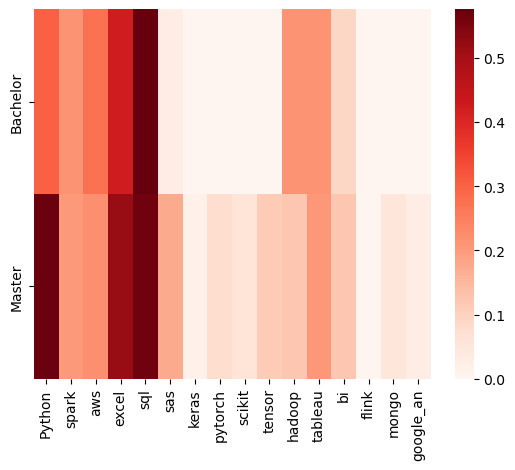

In [68]:
sns.heatmap(degree_skill_count, cmap="Reds")

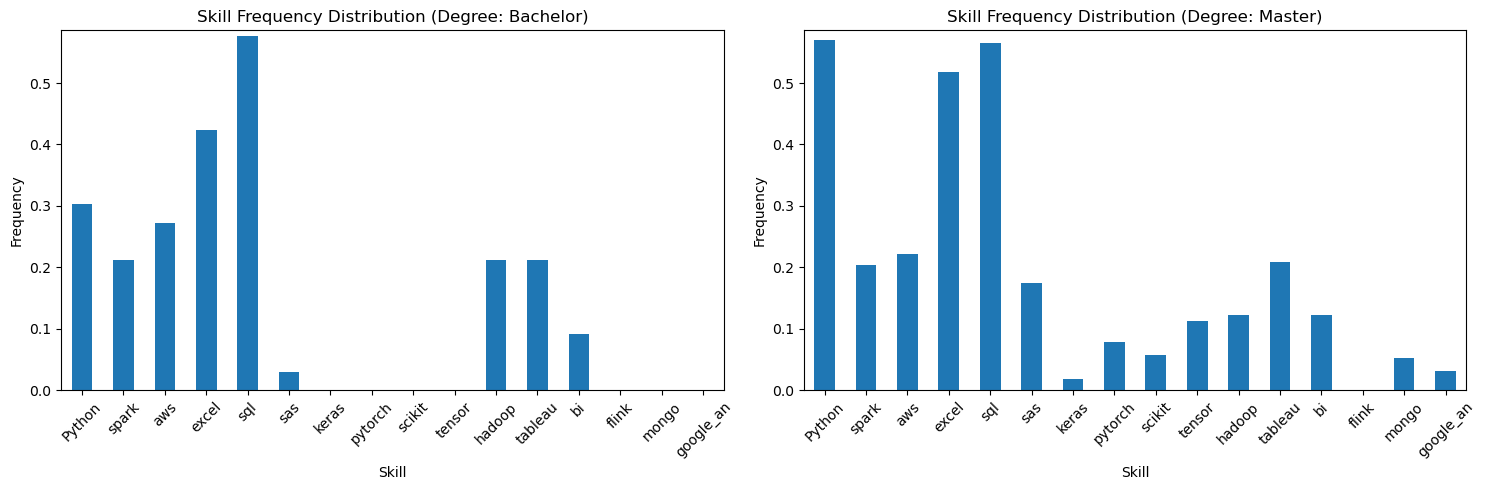

In [69]:
# Find the maximum frequency across all education levels
max_frequency = degree_skill_count.max().max()

# Number of subplots (based on education levels)
n_subplots = len(degree_skill_count)

# Create the figure and subplots
fig, axes = plt.subplots(nrows=1, ncols=n_subplots, figsize=(15, 5))  # Adjust figure size as needed

# Iterate through each row (education level) and plot on its respective subplot
for i, (degree, skills) in enumerate(degree_skill_count.iterrows()):
  ax = axes[i]  # Get the current subplot axis
  skills.plot.bar(ax=ax, ylim=(0, max_frequency + 0.01))  # Plot on the specific axis
  ax.set_title(f"Skill Frequency Distribution (Degree: {degree})")
  ax.set_xlabel("Skill")
  ax.set_ylabel("Frequency")
  ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

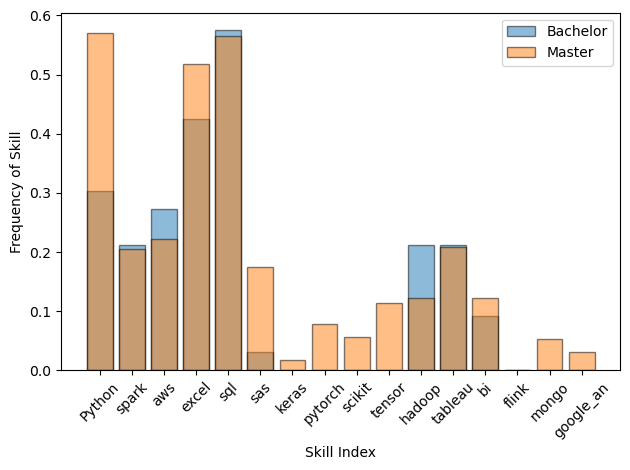

In [70]:
alpha = 0.5
color = [0, # red
         0, # green
         0 # bluen
]

for degree, skills in degree_skill_count.iterrows():
    # print(skills.index)
    if(degree == 'na'):
        continue
    plt.bar(skills.index, skills, label=degree, alpha=alpha, edgecolor=color)

plt.xlabel("Skill Index")  # Adjust label as needed if skill names are used on bars
plt.ylabel("Frequency of Skill")
plt.xticks(rotation=45)  # so skill names don't overlap
plt.legend()
plt.tight_layout()
plt.show()

Jobs that require Masters clearly demand more skills then bachelors so they clearly acquire more skills

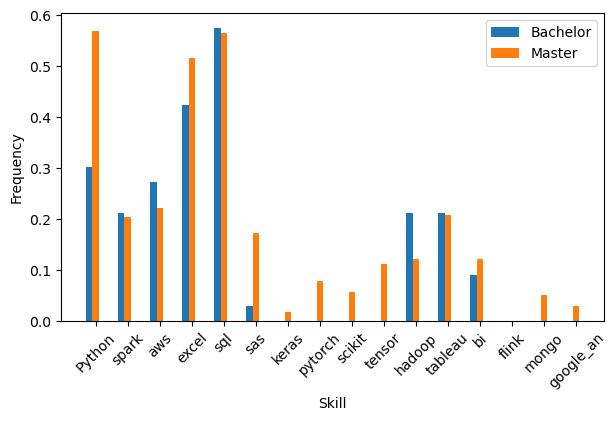

In [71]:
bar_width = 0.2
offset = 0.2

skill_names = degree_skill_count.columns.tolist()

plt.figure(figsize=(7, 4))

for i, (degree, skills) in enumerate(degree_skill_count.iterrows()):

  x_positions = [j+(i*offset) for j in range(len(skill_names))]

  plt.bar(x_positions, skills, bar_width, label=degree)

plt.xlabel("Skill")
plt.ylabel("Frequency")
plt.xticks(x_positions, skill_names, rotation=45)
plt.legend()
plt.show()

---

<h2> Answering Q5</h2>

**Q5: can we identify highly interconnected skills that are common across different industries?**
(Q5 is Extend for Q1 for the common skills as pairs (Q5 is Common work between Amr and Loay))

- Columns would be used: {(the skills columns), Industry}
- We aim to identify skills that are frequently required together. While co-occurrence matrices can provide initial insights into pairwise or potentially three-way relationships (limitations of 2D and 3D matrices), clustering techniques offer a more comprehensive approach. Clustering algorithms can group skills based on their co-occurrence patterns across various industries. This allows us to identify broader clusters of interconnected skills that frequently appear together. To visualize these skill clusters and their relationships, we can leverage data visualization techniques such as heatmaps, network graphs, or scatter plots. These visualizations will effectively depict the relative importance and interconnectedness of skills within each cluster, facilitating a deeper understanding of the skill landscape across different industry sectors.

Isolating skills and industries to work on them

In [72]:
skills = df.iloc[:, [i for i in range(22, 38)]]
industry_skills = skills.join(df['Industry'])

industry_skills['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', 'Consumer Products Manufacturing',
       'Industrial Manufacturing', 'Metals Brokers',
       'Financial Transaction Processing', 'Sporting Goods Stores',
       'Wholesale', 'Mining', 'Financial Analytics & Research',
       'Federal Agencies', 'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support Services',
       'TV Broadcast & Cable

Removing remaining nulls from each industry

In [73]:

industry_skills = industry_skills.drop(industry_skills[industry_skills['Industry'] == '-1'].index)
industry_skills['Industry'].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', 'Consumer Products Manufacturing',
       'Industrial Manufacturing', 'Metals Brokers',
       'Financial Transaction Processing', 'Sporting Goods Stores',
       'Wholesale', 'Mining', 'Financial Analytics & Research',
       'Federal Agencies', 'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support Services',
       'TV Broadcast & Cable

Identifying Highly Correlated Skills

In [74]:
pd.set_option('display.max_rows', None);

sorted_corr_skills = skills.corr().abs().unstack().sort_values(kind="quicksort").drop_duplicates()
sorted_corr_skills = sorted_corr_skills[lambda x: x != 1.0]


Grouping Skills With Their Eespective Industries

In [75]:
pd.set_option('display.max_rows', 100);
industry_skills_grouped = industry_skills.groupby('Industry')

Goals:


*   Constructing correlation matrices for each industry. These matrices will quantify the statistical relationships between various skills within each industry.
*   We need to identify the most frequently interconnected skill sets within each industry. These skills likely represent core competencies sought after in that specific industry.
*   Grouping interconnected skill sets across different industries. This will reveal potential commonalities and specializations in required skillsets across various sectors of the workforce.



    
    
    

Skill correlations are calculated for each industry and stored in a dictionary. To ensure data quality, the analysis excludes perfect correlations, duplicate entries within an industry, and industries lacking any correlations. Additionally, correlations below a predefined threshold (e.g., 0.6) are removed to focus on the most significant skill relationships.

In [76]:
ind_corr_skills = {}
for key, item in industry_skills_grouped:
    # print(key)
    item1 = item.iloc[:, :-1].corr().unstack().sort_values().drop_duplicates().dropna()
    item1 = item1[lambda x: x != 1.0]   #removing perfect correlations ex: (python, python)
    item1 = item1[lambda x: x >= 0.6]   #removing irrelavent correlations and keeping the most common

    if(len(item1) > 0):
        ind_corr_skills[key] = item1

# for ele in ind_corr_skills.keys():
#     print(ele)
ind_corr_skills
# print(len(ind_corr_skills))


{'Advertising & Marketing': sql  Python    0.636209
 dtype: float64,
 'Aerospace & Defense': hadoop  scikit     0.654654
 sql     spark      0.662266
 sas     bi         0.691564
 tensor  pytorch    0.871780
 spark   hadoop     0.888523
 dtype: float64,
 'Banks & Credit Unions': scikit   tableau    0.632456
 Python   sql        0.707107
 tableau  Python     0.707107
 dtype: float64,
 'Biotech & Pharmaceuticals': spark    mongo     0.613572
 sas      bi        0.623267
 pytorch  keras     0.641816
          tensor    0.694084
 hadoop   spark     0.758947
 mongo    hadoop    0.808452
 dtype: float64,
 'Colleges & Universities': sql      Python    0.632456
 tableau  sql       0.825723
 dtype: float64,
 'Computer Hardware & Software': scikit  tensor    0.604167
 dtype: float64,
 'Consulting': tensor  pytorch    0.800641
 dtype: float64,
 'Consumer Products Manufacturing': sql     Python    0.666667
 Python  bi        0.840168
 dtype: float64,
 'Enterprise Software & Network Solutions': ker

Exploration of Industry Skill Interconnectivity:


*   We can identify the industry exhibiting the highest number of skill correlations. This exploration aims to uncover potential patterns or specializations within various industry skillsets.




In [77]:
max = ["", 0]
for key in ind_corr_skills.keys():
    value_size = len(ind_corr_skills[key])
    if max[1] < value_size:
        max[1] = value_size
        max[0] = key
    # print(key + ": \t\t" + str(value_size))
    print("Key: %-*s  ValueSize: %s" % (40,key,value_size))

print("\n\nMAX: Key: %-*s  ValueSize: %s" % (40,max[0],max[1]))

Key: Advertising & Marketing                   ValueSize: 1
Key: Aerospace & Defense                       ValueSize: 5
Key: Banks & Credit Unions                     ValueSize: 3
Key: Biotech & Pharmaceuticals                 ValueSize: 6
Key: Colleges & Universities                   ValueSize: 2
Key: Computer Hardware & Software              ValueSize: 1
Key: Consulting                                ValueSize: 1
Key: Consumer Products Manufacturing           ValueSize: 2
Key: Enterprise Software & Network Solutions   ValueSize: 3
Key: Federal Agencies                          ValueSize: 1
Key: Financial Analytics & Research            ValueSize: 1
Key: Health Care Services & Hospitals          ValueSize: 2
Key: IT Services                               ValueSize: 2
Key: Insurance Carriers                        ValueSize: 3
Key: Lending                                   ValueSize: 1
Key: Real Estate                               ValueSize: 1
Key: Research & Development             

Prioritizing Skill Pairs and Discarding Correlation Values

In [78]:
for key in ind_corr_skills:
    items = list(ind_corr_skills[key].index)
    ind_corr_skills[key] = items

ind_corr_skills

{'Advertising & Marketing': [('sql', 'Python')],
 'Aerospace & Defense': [('hadoop', 'scikit'),
  ('sql', 'spark'),
  ('sas', 'bi'),
  ('tensor', 'pytorch'),
  ('spark', 'hadoop')],
 'Banks & Credit Unions': [('scikit', 'tableau'),
  ('Python', 'sql'),
  ('tableau', 'Python')],
 'Biotech & Pharmaceuticals': [('spark', 'mongo'),
  ('sas', 'bi'),
  ('pytorch', 'keras'),
  ('pytorch', 'tensor'),
  ('hadoop', 'spark'),
  ('mongo', 'hadoop')],
 'Colleges & Universities': [('sql', 'Python'), ('tableau', 'sql')],
 'Computer Hardware & Software': [('scikit', 'tensor')],
 'Consulting': [('tensor', 'pytorch')],
 'Consumer Products Manufacturing': [('sql', 'Python'), ('Python', 'bi')],
 'Enterprise Software & Network Solutions': [('keras', 'tensor'),
  ('bi', 'tableau'),
  ('spark', 'hadoop')],
 'Federal Agencies': [('tableau', 'mongo')],
 'Financial Analytics & Research': [('excel', 'sql')],
 'Health Care Services & Hospitals': [('tableau', 'sql'), ('spark', 'Python')],
 'IT Services': [('keras'

Convert Data to DataFrame for Enhanced Analysis

In [79]:
skill_pairs = []
industries = []

for industry, skill_pair_list in ind_corr_skills.items():
  skill_pairs.extend(skill_pair_list)
  industries.extend([industry for i in range(len(skill_pair_list))])

ind_corr_skills_df = pd.DataFrame(skill_pairs, columns=['skill 1', 'skill 2'])

ind_corr_skills_df['industry'] = industries

ind_corr_skills_df.head(20)

skill 1  skill 2                         industry
0       sql   Python          Advertising & Marketing
1    hadoop   scikit              Aerospace & Defense
2       sql    spark              Aerospace & Defense
3       sas       bi              Aerospace & Defense
4    tensor  pytorch              Aerospace & Defense
5     spark   hadoop              Aerospace & Defense
6    scikit  tableau            Banks & Credit Unions
7    Python      sql            Banks & Credit Unions
8   tableau   Python            Banks & Credit Unions
9     spark    mongo        Biotech & Pharmaceuticals
10      sas       bi        Biotech & Pharmaceuticals
11  pytorch    keras        Biotech & Pharmaceuticals
12  pytorch   tensor        Biotech & Pharmaceuticals
13   hadoop    spark        Biotech & Pharmaceuticals
14    mongo   hadoop        Biotech & Pharmaceuticals
15      sql   Python          Colleges & Universities
16  tableau      sql          Colleges & Universities
17   scikit   tensor     Computer Hardware & Software
18   tensor  pytorch                       Consulting
19      sql   Python  Consumer Products Manufacturing

Combining skill pairs in a column

In [80]:
ind_corr_skills_df['Skill Pairs'] = ind_corr_skills_df['skill 1'] + ", " + ind_corr_skills_df['skill 2']
ind_corr_skills_df.head(20)

skill 1  skill 2                         industry      Skill Pairs
0       sql   Python          Advertising & Marketing      sql, Python
1    hadoop   scikit              Aerospace & Defense   hadoop, scikit
2       sql    spark              Aerospace & Defense       sql, spark
3       sas       bi              Aerospace & Defense          sas, bi
4    tensor  pytorch              Aerospace & Defense  tensor, pytorch
5     spark   hadoop              Aerospace & Defense    spark, hadoop
6    scikit  tableau            Banks & Credit Unions  scikit, tableau
7    Python      sql            Banks & Credit Unions      Python, sql
8   tableau   Python            Banks & Credit Unions  tableau, Python
9     spark    mongo        Biotech & Pharmaceuticals     spark, mongo
10      sas       bi        Biotech & Pharmaceuticals          sas, bi
11  pytorch    keras        Biotech & Pharmaceuticals   pytorch, keras
12  pytorch   tensor        Biotech & Pharmaceuticals  pytorch, tensor
13   hadoop    spark        Biotech & Pharmaceuticals    hadoop, spark
14    mongo   hadoop        Biotech & Pharmaceuticals    mongo, hadoop
15      sql   Python          Colleges & Universities      sql, Python
16  tableau      sql          Colleges & Universities     tableau, sql
17   scikit   tensor     Computer Hardware & Software   scikit, tensor
18   tensor  pytorch                       Consulting  tensor, pytorch
19      sql   Python  Consumer Products Manufacturing      sql, Python

<h4>Visualization of Skill Pair Distribution Across Industries</h4>

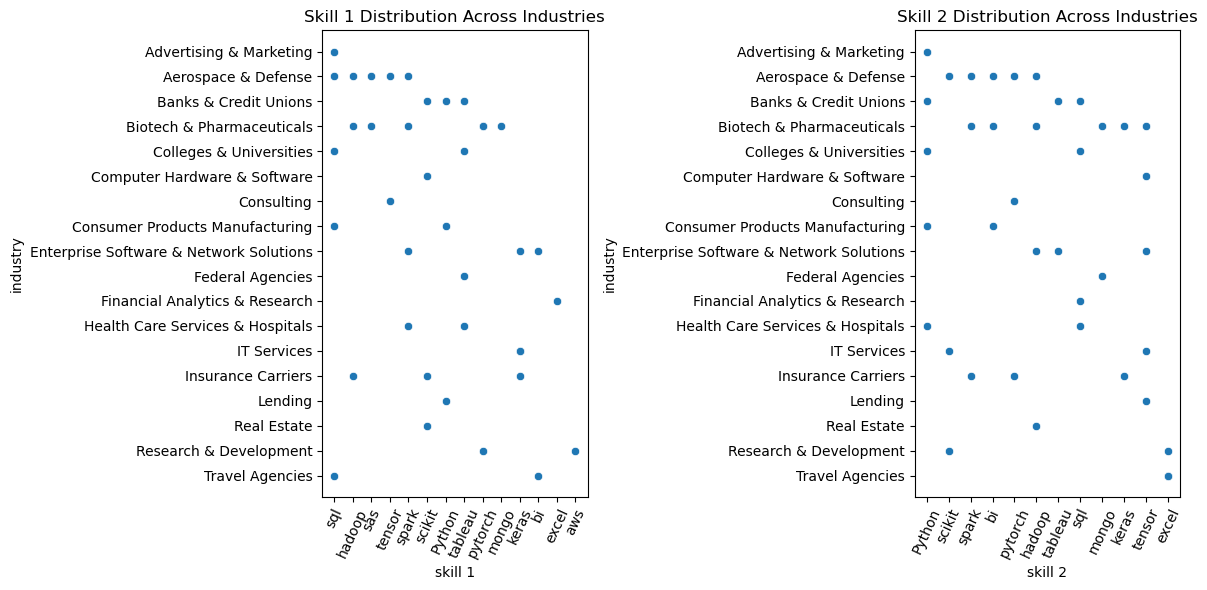

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(ind_corr_skills_df, x='skill 1', y='industry', ax=ax1)
ax1.set_title("Skill 1 Distribution Across Industries")

sns.scatterplot(ind_corr_skills_df, x='skill 2', y='industry', ax=ax2)
ax2.set_title("Skill 2 Distribution Across Industries")

for tick in ax1.get_xticklabels():
    tick.set_rotation(65)

for tick in ax2.get_xticklabels():
    tick.set_rotation(65)

# plt.xticks(rotation=45)
# Adjust layout (optional)
plt.tight_layout()
plt.show()

This visualization depicts the industry distribution of a specific skill pair. By analyzing this distribution, we can identify industry clusters that share a common requirement for this particular skill set.

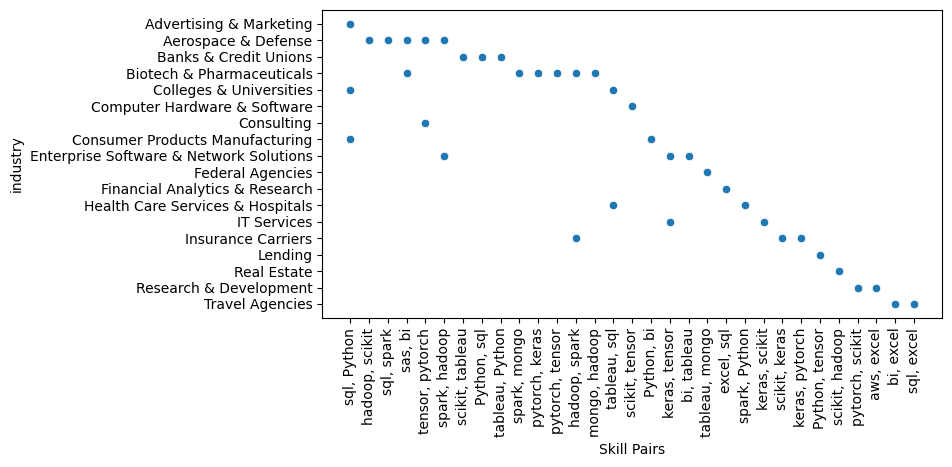

In [82]:
plt.figure(figsize=(8, 4))
sns.scatterplot(ind_corr_skills_df, x='Skill Pairs', y='industry')

plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

Comparative analysis of sectors and industries to determine if sectors represent broader categorizations of the more specific industry classifications.

In [83]:
skills_count = []
for key, item in industry_skills_grouped:
    skills_count.append(item.iloc[:, :-1].mean())

skills_count
industry_skills_count = pd.DataFrame(skills_count, index=industry_skills_grouped.groups.keys())
# # degree_skill_count['Degree'] =degree_groups.groups.keys()
industry_skills_count.describe()

Python      spark        aws      excel        sql        sas  \
count  56.000000  56.000000  56.000000  56.000000  56.000000  56.000000   
mean    0.558273   0.159355   0.214603   0.536990   0.585812   0.104285   
std     0.400525   0.254098   0.303204   0.379417   0.379016   0.200234   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.150000   0.000000   0.000000   0.165025   0.276786   0.000000   
50%     0.630682   0.000000   0.000000   0.556990   0.666667   0.000000   
75%     1.000000   0.257172   0.362105   1.000000   1.000000   0.090278   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

           keras    pytorch     scikit     tensor     hadoop    tableau  \
count  56.000000  56.000000  56.000000  56.000000  56.000000  56.000000   
mean    0.033124   0.042806   0.051718   0.115094   0.116008   0.233801   
std     0.101162   0.151462   0.153777   0.243251   0.201144   0.298220   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.125000   
75%     0.000000   0.000000   0.010000   0.114840   0.210345   0.340909   
max     0.500000   1.000000   1.000000   1.000000   1.000000   1.000000   

              bi      flink      mongo  google_an  
count  56.000000  56.000000  56.000000  56.000000  
mean    0.110192   0.012292   0.070006   0.049048  
std     0.245516   0.068169   0.160729   0.175350  
min     0.000000   0.000000   0.000000   0.000000  
25%     0.000000   0.000000   0.000000   0.000000  
50%     0.000000   0.000000   0.000000   0.000000  
75%     0.089394   0.000000   0.004098   0.000000  
max     1.000000   0.500000   0.666667   1.000000

<Axes: >

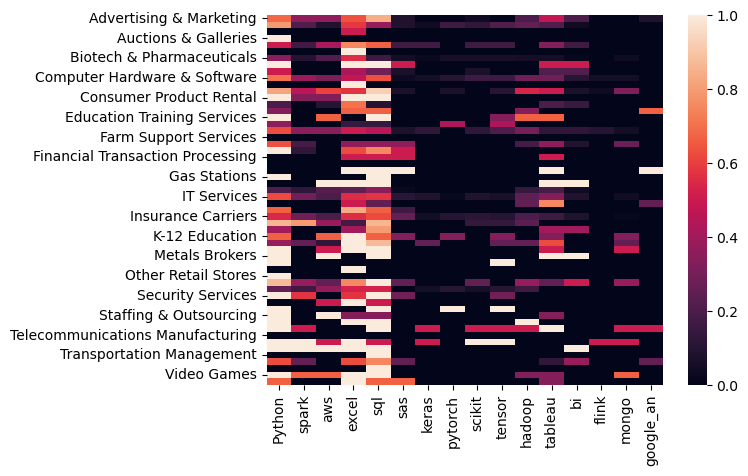

In [84]:
sns.heatmap(industry_skills_count)

In [85]:
pd.set_option('display.max_rows', None);

sector_skills = skills.join(df['Sector'])
sector_skills = sector_skills.drop(sector_skills[sector_skills['Sector'] == '-1'].index)

sector_skills_grouped = sector_skills.groupby('Sector')  #grouping skills for each unique 'Degree'
for x in sector_skills_grouped.groups:
    print(str(x) + ": " + str(len(sector_skills_grouped.groups[x])))

Aerospace & Defense: 24
Agriculture & Forestry: 1
Arts, Entertainment & Recreation: 4
Biotech & Pharmaceuticals: 106
Business Services: 89
Construction, Repair & Maintenance: 3
Consumer Services: 3
Education: 20
Finance: 42
Government: 11
Health Care: 49
Information Technology: 171
Insurance: 67
Manufacturing: 30
Media: 6
Mining & Metals: 3
Non-Profit: 2
Oil, Gas, Energy & Utilities: 14
Real Estate: 8
Retail: 15
Telecommunications: 6
Transportation & Logistics: 8
Travel & Tourism: 8


<Axes: >

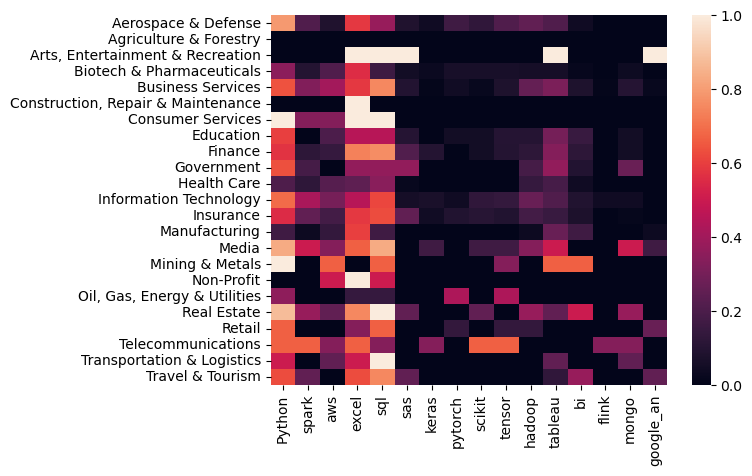

In [86]:
skills_count = []
for key, item in sector_skills_grouped:
    skills_count.append(item.iloc[:, :-1].mean())

skills_count
sector_skills_count = pd.DataFrame(skills_count, index=sector_skills_grouped.groups.keys())

sns.heatmap(sector_skills_count)

Initial findings suggest a high degree of similarity between sectors and industries in terms of skill requirements. Sectors may represent a more general level of categorization compared to the more specific industry classifications.

---

<h2> Answering Q6</h2>

**Q6: Find the skills that highly correlate with a specific sector and find if there is an overlap between these specialized across different sectors**

<ul>
  <li>Find the 10 most common skills</li>
  <li>Finding which skills each sector uses most</li>
  <li>Use this as the connected skills for each sector and check which sectors share the same skill groups</li>
  <li>With the skill groups as the x axis and see which sector belong to which skill groups, and we got the sector clusters for each skill groups</li>
</ul>

Taking a quick look

In [87]:
sector_skills_count

Python     spark       aws     excel  \
Aerospace & Defense                 0.791667  0.208333  0.083333  0.583333   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    0.000000  0.000000  0.000000  1.000000   
Biotech & Pharmaceuticals           0.349057  0.094340  0.207547  0.556604   
Business Services                   0.640449  0.325843  0.404494  0.584270   
Construction, Repair & Maintenance  0.000000  0.000000  0.000000  1.000000   
Consumer Services                   1.000000  0.333333  0.333333  1.000000   
Education                           0.600000  0.000000  0.200000  0.450000   
Finance                             0.571429  0.119048  0.142857  0.738095   
Government                          0.636364  0.181818  0.000000  0.363636   
Health Care                         0.204082  0.122449  0.224490  0.244898   
Information Technology              0.690058  0.421053  0.304094  0.450292   
Insurance                           0.552239  0.253731  0.179104  0.582090   
Manufacturing                       0.166667  0.033333  0.133333  0.600000   
Media                               0.833333  0.500000  0.333333  0.666667   
Mining & Metals                     1.000000  0.000000  0.666667  0.000000   
Non-Profit                          0.000000  0.000000  0.500000  1.000000   
Oil, Gas, Energy & Utilities        0.357143  0.000000  0.000000  0.142857   
Real Estate                         0.875000  0.375000  0.250000  0.750000   
Retail                              0.666667  0.000000  0.000000  0.333333   
Telecommunications                  0.666667  0.666667  0.333333  0.666667   
Transportation & Logistics          0.500000  0.000000  0.250000  0.500000   
Travel & Tourism                    0.625000  0.250000  0.000000  0.625000   

                                         sql       sas     keras   pytorch  \
Aerospace & Defense                 0.375000  0.083333  0.041667  0.166667   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    1.000000  1.000000  0.000000  0.000000   
Biotech & Pharmaceuticals           0.160377  0.047170  0.028302  0.066038   
Business Services                   0.752809  0.089888  0.011236  0.044944   
Construction, Repair & Maintenance  0.000000  0.000000  0.000000  0.000000   
Consumer Services                   1.000000  0.000000  0.000000  0.000000   
Education                           0.450000  0.100000  0.000000  0.050000   
Finance                             0.761905  0.214286  0.095238  0.000000   
Government                          0.363636  0.363636  0.000000  0.000000   
Health Care                         0.346939  0.020408  0.000000  0.000000   
Information Technology              0.614035  0.058480  0.070175  0.040936   
Insurance                           0.626866  0.253731  0.044776  0.089552   
Manufacturing                       0.166667  0.000000  0.000000  0.000000   
Media                               0.833333  0.000000  0.166667  0.000000   
Mining & Metals                     0.666667  0.000000  0.000000  0.000000   
Non-Profit                          0.500000  0.000000  0.000000  0.000000   
Oil, Gas, Energy & Utilities        0.142857  0.000000  0.000000  0.428571   
Real Estate                         1.000000  0.250000  0.000000  0.000000   
Retail                              0.666667  0.000000  0.000000  0.133333   
Telecommunications                  0.333333  0.000000  0.333333  0.000000   
Transportation & Logistics          1.000000  0.000000  0.000000  0.000000   
Travel & Tourism                    0.750000  0.250000  0.000000  0.000000   

                                      scikit    tensor    hadoop   tableau  \
Aerospace & Defense                 0.125000  0.208333  0.250000  0.208333   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    0.000000  0.000000  0.

In [88]:
sector_skills_count['Sectors'] = sector_skills_count.index
sector_skills_count

Python     spark       aws     excel  \
Aerospace & Defense                 0.791667  0.208333  0.083333  0.583333   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    0.000000  0.000000  0.000000  1.000000   
Biotech & Pharmaceuticals           0.349057  0.094340  0.207547  0.556604   
Business Services                   0.640449  0.325843  0.404494  0.584270   
Construction, Repair & Maintenance  0.000000  0.000000  0.000000  1.000000   
Consumer Services                   1.000000  0.333333  0.333333  1.000000   
Education                           0.600000  0.000000  0.200000  0.450000   
Finance                             0.571429  0.119048  0.142857  0.738095   
Government                          0.636364  0.181818  0.000000  0.363636   
Health Care                         0.204082  0.122449  0.224490  0.244898   
Information Technology              0.690058  0.421053  0.304094  0.450292   
Insurance                           0.552239  0.253731  0.179104  0.582090   
Manufacturing                       0.166667  0.033333  0.133333  0.600000   
Media                               0.833333  0.500000  0.333333  0.666667   
Mining & Metals                     1.000000  0.000000  0.666667  0.000000   
Non-Profit                          0.000000  0.000000  0.500000  1.000000   
Oil, Gas, Energy & Utilities        0.357143  0.000000  0.000000  0.142857   
Real Estate                         0.875000  0.375000  0.250000  0.750000   
Retail                              0.666667  0.000000  0.000000  0.333333   
Telecommunications                  0.666667  0.666667  0.333333  0.666667   
Transportation & Logistics          0.500000  0.000000  0.250000  0.500000   
Travel & Tourism                    0.625000  0.250000  0.000000  0.625000   

                                         sql       sas     keras   pytorch  \
Aerospace & Defense                 0.375000  0.083333  0.041667  0.166667   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    1.000000  1.000000  0.000000  0.000000   
Biotech & Pharmaceuticals           0.160377  0.047170  0.028302  0.066038   
Business Services                   0.752809  0.089888  0.011236  0.044944   
Construction, Repair & Maintenance  0.000000  0.000000  0.000000  0.000000   
Consumer Services                   1.000000  0.000000  0.000000  0.000000   
Education                           0.450000  0.100000  0.000000  0.050000   
Finance                             0.761905  0.214286  0.095238  0.000000   
Government                          0.363636  0.363636  0.000000  0.000000   
Health Care                         0.346939  0.020408  0.000000  0.000000   
Information Technology              0.614035  0.058480  0.070175  0.040936   
Insurance                           0.626866  0.253731  0.044776  0.089552   
Manufacturing                       0.166667  0.000000  0.000000  0.000000   
Media                               0.833333  0.000000  0.166667  0.000000   
Mining & Metals                     0.666667  0.000000  0.000000  0.000000   
Non-Profit                          0.500000  0.000000  0.000000  0.000000   
Oil, Gas, Energy & Utilities        0.142857  0.000000  0.000000  0.428571   
Real Estate                         1.000000  0.250000  0.000000  0.000000   
Retail                              0.666667  0.000000  0.000000  0.133333   
Telecommunications                  0.333333  0.000000  0.333333  0.000000   
Transportation & Logistics          1.000000  0.000000  0.000000  0.000000   
Travel & Tourism                    0.750000  0.250000  0.000000  0.000000   

                                      scikit    tensor    hadoop   tableau  \
Aerospace & Defense                 0.125000  0.208333  0.250000  0.208333   
Agriculture & Forestry              0.000000  0.000000  0.000000  0.000000   
Arts, Entertainment & Recreation    0.000000  0.000000  0.

Getting the skills that highly correlate for each Sectors by a threshold

In [89]:
def filter_skills_by_sector(df, threshold=0.5):
  filtered_df = df.copy()  # Create a copy to avoid modifying the original
  for col in filtered_df.columns:
    if col == 'Sectors':
      continue
    filtered_df.loc[filtered_df[col] < threshold, col] = None  # Set values below threshold to None
  filtered_df.dropna(axis=1, how='all', inplace=True)  # Drop columns with only None values
  return filtered_df.melt(id_vars='Sectors', var_name='Skill')

# Filter the DataFrame with a threshold of 0.5 (or adjust as needed)
filtered_sector_df = filter_skills_by_sector(sector_skills_count.copy(), threshold=0.5)

# Print the filtered DataFrame (optional)
filtered_sector_df

Sectors      Skill     value
0                   Aerospace & Defense     Python  0.791667
1                Agriculture & Forestry     Python       NaN
2      Arts, Entertainment & Recreation     Python       NaN
3             Biotech & Pharmaceuticals     Python       NaN
4                     Business Services     Python  0.640449
5    Construction, Repair & Maintenance     Python       NaN
6                     Consumer Services     Python  1.000000
7                             Education     Python  0.600000
8                               Finance     Python  0.571429
9                            Government     Python  0.636364
10                          Health Care     Python       NaN
11               Information Technology     Python  0.690058
12                            Insurance     Python  0.552239
13                        Manufacturing     Python       NaN
14                                Media     Python  0.833333
15                      Mining & Metals     Python  1.000000
16                           Non-Profit     Python       NaN
17         Oil, Gas, Energy & Utilities     Python       NaN
18                          Real Estate     Python  0.875000
19                               Retail     Python  0.666667
20                   Telecommunications     Python  0.666667
21           Transportation & Logistics     Python  0.500000
22                     Travel & Tourism     Python  0.625000
23                  Aerospace & Defense      spark       NaN
24               Agriculture & Forestry      spark       NaN
25     Arts, Entertainment & Recreation      spark       NaN
26            Biotech & Pharmaceuticals      spark       NaN
27                    Business Services      spark       NaN
28   Construction, Repair & Maintenance      spark       NaN
29                    Consumer Services      spark       NaN
30                            Education      spark       NaN
31                              Finance      spark       NaN
32                           Government      spark       NaN
33                          Health Care      spark       NaN
34               Information Technology      spark       NaN
35                            Insurance      spark       NaN
36                        Manufacturing      spark       NaN
37                                Media      spark  0.500000
38                      Mining & Metals      spark       NaN
39                           Non-Profit      spark       NaN
40         Oil, Gas, Energy & Utilities      spark       NaN
41                          Real Estate      spark       NaN
42                               Retail      spark       NaN
43                   Telecommunications      spark  0.666667
44           Transportation & Logistics      spark       NaN
45                     Travel & Tourism      spark       NaN
46                  Aerospace & Defense        aws       NaN
47               Agriculture & Forestry        aws       NaN
48     Arts, Entertainment & Recreation        aws       NaN
49            Biotech & Pharmaceuticals        aws       NaN
50                    Business Services        aws       NaN
51   Construction, Repair & Maintenance        aws       NaN
52                    Consumer Services        aws       NaN
53                            Education        aws       NaN
54                              Finance        aws       NaN
55                           Government        aws       NaN
56                          Health Care        aws       NaN
57               Information Technology        aws       NaN
58                            Insurance        aws       NaN
59                        Manufacturing        aws       NaN
60                                Media        aws       NaN
61                      Mining & Metals        aws  0.666667
62                           Non-Profit        aws  0.500000
63         Oil, Gas, Energy & Utilities        aws       NaN
64                          Real Estate        aws       NaN
65    

In [90]:
filtered_sector_df = filtered_sector_df.dropna()
filtered_sector_df

Sectors      Skill     value
0                   Aerospace & Defense     Python  0.791667
4                     Business Services     Python  0.640449
6                     Consumer Services     Python  1.000000
7                             Education     Python  0.600000
8                               Finance     Python  0.571429
9                            Government     Python  0.636364
11               Information Technology     Python  0.690058
12                            Insurance     Python  0.552239
14                                Media     Python  0.833333
15                      Mining & Metals     Python  1.000000
18                          Real Estate     Python  0.875000
19                               Retail     Python  0.666667
20                   Telecommunications     Python  0.666667
21           Transportation & Logistics     Python  0.500000
22                     Travel & Tourism     Python  0.625000
37                                Media      spark  0.500000
43                   Telecommunications      spark  0.666667
61                      Mining & Metals        aws  0.666667
62                           Non-Profit        aws  0.500000
69                  Aerospace & Defense      excel  0.583333
71     Arts, Entertainment & Recreation      excel  1.000000
72            Biotech & Pharmaceuticals      excel  0.556604
73                    Business Services      excel  0.584270
74   Construction, Repair & Maintenance      excel  1.000000
75                    Consumer Services      excel  1.000000
77                              Finance      excel  0.738095
81                            Insurance      excel  0.582090
82                        Manufacturing      excel  0.600000
83                                Media      excel  0.666667
85                           Non-Profit      excel  1.000000
87                          Real Estate      excel  0.750000
89                   Telecommunications      excel  0.666667
90           Transportation & Logistics      excel  0.500000
91                     Travel & Tourism      excel  0.625000
94     Arts, Entertainment & Recreation        sql  1.000000
96                    Business Services        sql  0.752809
98                    Consumer Services        sql  1.000000
100                             Finance        sql  0.761905
103              Information Technology        sql  0.614035
104                           Insurance        sql  0.626866
106                               Media        sql  0.833333
107                     Mining & Metals        sql  0.666667
108                          Non-Profit        sql  0.500000
110                         Real Estate        sql  1.000000
111                              Retail        sql  0.666667
113          Transportation & Logistics        sql  1.000000
114                    Travel & Tourism        sql  0.750000
117    Arts, Entertainment & Recreation        sas  1.000000
158                  Telecommunications     scikit  0.666667
181                  Telecommunications     tensor  0.666667
186    Arts, Entertainment & Recreation    tableau  1.000000
198                               Media    tableau  0.500000
199                     Mining & Metals    tableau  0.666667
222                     Mining & Metals         bi  0.666667
225                         Real Estate         bi  0.500000
244                               Media      mongo  0.500000
255    Arts, Entertainment & Recreation  google_an  1.000000

<h3>Sectors Identified

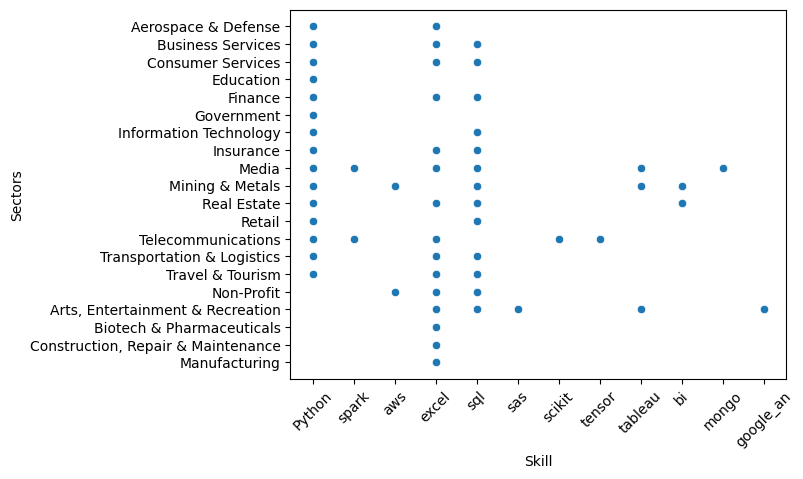

In [91]:
sns.scatterplot(filtered_sector_df, x='Skill', y='Sectors')
plt.xticks(rotation=45)


plt.show()

it looks similar to the heatmap

<Axes: >

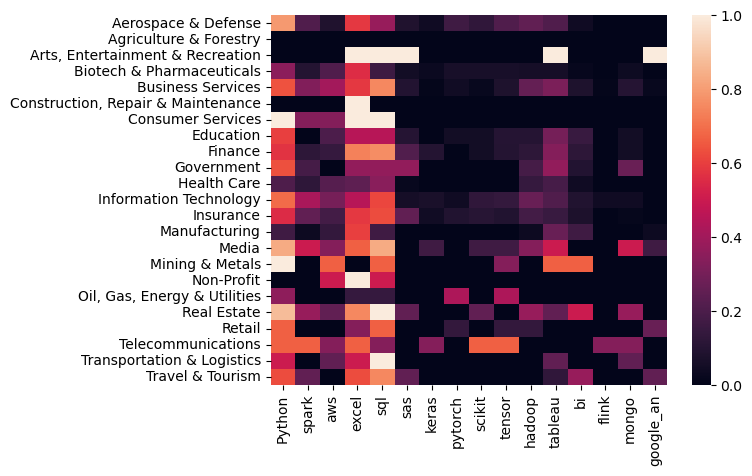

In [92]:
sns.heatmap(sector_skills_count.drop('Sectors', axis=1))

# Sameh218767 Work

<h2> Answering Q7</h2>

**Q 7: Can we identify specific skill combinations that correlate to higher salary in different industries, compared to the same skills assessed individually?**

To first answer this question, we must first answer:

*   **Q 7.1: Which skills are often correlated together?**
*   **Q 7.2: What is the average salary to each of the correlated skills ?**
*   **Q 7.3: How does the average salary compare between the previous correlation to that of the individual skills and their salaries?**




First, we get the correlation between each skill and the other.

# Q 7.1: Which skills are often correlated together?

<Axes: >

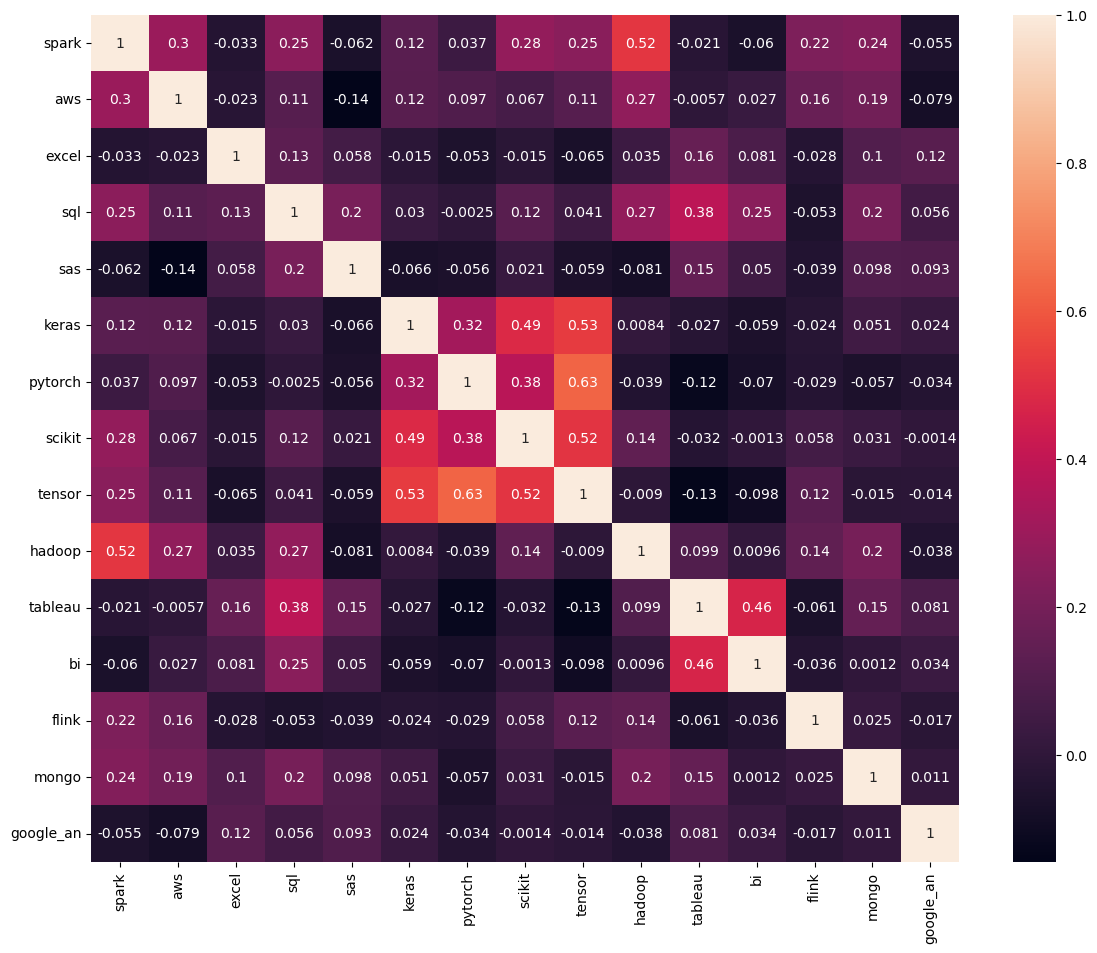

In [93]:
skills_columns = df.columns[23:38]
plt.figure(figsize=(14, 11))
sns.heatmap(df[skills_columns].corr(),annot=True)

We then proceed to create a new dataframe that groups correlated skills and the degree of their correlation, answering the question:

# Q 7.1: Which skills are often correlated together? (Continued)

In [94]:

skills_corr = df[skills_columns].corr()

skills_list = []
correlation_list = []

for i in range(len(skills_corr)):
  for j in range(len(skills_corr)):
    corr_loc = skills_corr.iloc[i][j]
    if corr_loc != 1:
      s_row = skills_corr.index.tolist()[i]
      s_column = skills_corr.columns.tolist()[j]
      skills_list.append([s_row, s_column])
      correlation_list.append(corr_loc)

print("Q.7.1. Answer: Skills that are often correlated together (in Order) are as follows: ")
corr_groupings = {'Skills': skills_list, 'Correlation': correlation_list}
corr_groupings = pd.DataFrame.from_dict(corr_groupings)
corr_groupings = corr_groupings.drop_duplicates(subset=['Correlation'], keep='first')
corr_groupings = corr_groupings.sort_values(by='Correlation', ascending=False).reset_index(drop=True)
corr_groupings.head(15)

Q.7.1. Answer: Skills that are often correlated together (in Order) are as follows: 


Skills  Correlation
0   [pytorch, tensor]     0.628332
1     [keras, tensor]     0.530664
2     [spark, hadoop]     0.520428
3    [scikit, tensor]     0.515166
4     [keras, scikit]     0.485775
5       [tableau, bi]     0.463576
6      [sql, tableau]     0.384882
7   [pytorch, scikit]     0.375370
8    [keras, pytorch]     0.316924
9        [spark, aws]     0.297702
10    [spark, scikit]     0.277918
11      [sql, hadoop]     0.272828
12      [aws, hadoop]     0.271203
13       [spark, sql]     0.254198
14    [spark, tensor]     0.251828

# Q 7.2: What is the average salary to each of the correlated skills ?

In [95]:

corr_groupings['Avg Salary'] = 0
corr_groupings['Avg Salary'] = corr_groupings['Avg Salary'].astype(float)
skills_salaries = []
filtered_df = pd.DataFrame
for i in range(len(corr_groupings)):
    f_skill = corr_groupings['Skills'].tolist()[i][0]
    s_skill = corr_groupings['Skills'].tolist()[i][1]
    filtered_df = df[(df[f_skill] == 1) & (df[s_skill] == 1)]
    if not filtered_df.empty:
      corr_groupings.loc[i, 'Avg Salary'] = filtered_df.groupby([f_skill, s_skill])['Avg Salary(K)'].mean().values[0]

# Remove correlations where neither skills is ever present
corr_groupings = corr_groupings[corr_groupings['Avg Salary'] != 0].reset_index(drop=True)
print("Q.7.2. Answer: The average salary to each correlated skills are: ")
corr_groupings.head(100)

Q.7.2. Answer: The average salary to each correlated skills are: 


Skills  Correlation  Avg Salary
0      [pytorch, tensor]     0.628332  110.196970
1        [keras, tensor]     0.530664  129.416667
2        [spark, hadoop]     0.520428  111.607143
3       [scikit, tensor]     0.515166  127.303030
4        [keras, scikit]     0.485775  121.947368
5          [tableau, bi]     0.463576  100.065217
6         [sql, tableau]     0.384882   95.023810
7      [pytorch, scikit]     0.375370  113.333333
8       [keras, pytorch]     0.316924  121.090909
9           [spark, aws]     0.297702  119.000000
10       [spark, scikit]     0.277918  129.181818
11         [sql, hadoop]     0.272828  108.515625
12         [aws, hadoop]     0.271203  117.798246
13          [spark, sql]     0.254198  111.225000
14       [spark, tensor]     0.251828  127.710526
15             [sql, bi]     0.251286   95.605769
16        [spark, mongo]     0.235064  115.833333
17        [spark, flink]     0.220711  129.000000
18            [sql, sas]     0.204705  104.872727
19          [sql, mongo]     0.203478  113.428571
20       [hadoop, mongo]     0.201036  119.166667
21          [aws, mongo]     0.188106  120.547619
22          [aws, flink]     0.162473  122.625000
23      [excel, tableau]     0.155525   92.239362
24        [sas, tableau]     0.154493   95.519231
25      [tableau, mongo]     0.151858  102.617647
26       [hadoop, flink]     0.139101  116.166667
27      [scikit, hadoop]     0.138056  134.750000
28          [excel, sql]     0.132197   95.971154
29       [tensor, flink]     0.121268  148.250000
30        [spark, keras]     0.119348  131.692308
31    [excel, google_an]     0.118417   63.576923
32          [aws, keras]     0.118398  137.576923
33         [sql, scikit]     0.116844  125.554054
34         [aws, tensor]     0.113077  129.942308
35            [aws, sql]     0.112928  110.235000
36        [excel, mongo]     0.101150  110.685185
37     [hadoop, tableau]     0.098541  106.014706
38          [sas, mongo]     0.097577  113.250000
39        [aws, pytorch]     0.096842  129.733333
40      [sas, google_an]     0.092997   48.500000
41           [excel, bi]     0.080779   93.027778
42  [tableau, google_an]     0.080756   71.583333
43         [aws, scikit]     0.066795  135.911765
44       [scikit, flink]     0.058443  142.000000
45          [excel, sas]     0.057709  101.937500
46      [sql, google_an]     0.056293   68.750000
47        [keras, mongo]     0.051498  123.333333
48             [sas, bi]     0.049834   90.187500
49         [sql, tensor]     0.040609  122.812500
50      [spark, pytorch]     0.036894  114.363636
51       [excel, hadoop]     0.034512  108.492308
52       [bi, google_an]     0.033552   53.500000
53       [scikit, mongo]     0.031112  129.250000
54          [sql, keras]     0.029788  118.031250
55             [aws, bi]     0.027411  107.433333
56        [flink, mongo]     0.024965  177.000000
57    [keras, google_an]     0.023971  128.000000
58         [sas, scikit]     0.021127  121.250000
59    [mongo, google_an]     0.011375  128.000000
60          [hadoop, bi]     0.009610  119.800000
61       [keras, hadoop]     0.008400  142.000000
62           [bi, mongo]     0.001205   95.833333
63          [scikit, bi]    -0.001334  115.125000
64   [scikit, google_an]    -0.001367  128.000000
65        [sql, pytorch]    -0.002538  113.342105
66        [aws, tableau]    -0.005680  105.328125
67      [tensor, hadoop]    -0.009012  128.545455
68   [tensor, google_an]    -0.013706  128.000000
69        [excel, keras]    -0.014502  109.346154
70       [tensor, mongo]    -0.015011  123.333333
71       [excel, scikit]    -0.015375  107.120000
72      [spark, tableau]    -0.021038  102.633333
73          [aws, excel]    -0.022629  109.481250
74      [keras, tableau]    -0.027474  104.250000
75        [excel, flink]    -0.028489  148.250000
76     [scikit, tableau]    -0.032340  109.937500
77        [spark, excel]    -0.032867  109.929487
78   [hadoop, google_an]    -0.037636  128.000000
79     [pytorch, h

# Q 7.3: How does the average salary compare between the previous correlation to that of the individual skills and their salaries?


In [96]:

salary_and_skills = list(df)[19:20] + list(df.columns[23:38])
sas = df[salary_and_skills]
skills_salaryy = {}
for i in range(len(salary_and_skills)):
  extracted = sas[sas[sas.columns[i]] == 1]
  if not extracted.empty:
    skills_salaryy[sas.columns[i]]= extracted.groupby(sas.columns[i])['Avg Salary(K)'].mean().values[0]
print(skills_salaryy)

{'spark': 113.203125, 'aws': 112.25465838509317, 'excel': 97.67366946778712, 'sql': 101.71648044692738, 'sas': 113.70454545454545, 'keras': 124.25925925925925, 'pytorch': 108.77027027027027, 'scikit': 125.50980392156863, 'tensor': 120.32608695652173, 'hadoop': 110.52564102564102, 'tableau': 93.9, 'bi': 95.68181818181819, 'flink': 129.0, 'mongo': 113.08108108108108, 'google_an': 68.17857142857143}


In [97]:

for skill, avg_salary in skills_salaryy.items():
  for i in range(len(corr_groupings)):
    f_skill = corr_groupings['Skills'].tolist()[i][0]
    s_skill = corr_groupings['Skills'].tolist()[i][1]
    if skill == f_skill:
      corr_groupings.loc[i,'Skill 1'] = skill
      corr_groupings.loc[i,'Avg Salary (Skill 1)'] = avg_salary
    if skill == s_skill:
      corr_groupings.loc[i,'Skill 2'] = skill
      corr_groupings.loc[i,'Avg Salary (Skill 2)'] = avg_salary

corr_groupings.head(100)

Skills  Correlation  Avg Salary  Skill 1  \
0      [pytorch, tensor]     0.628332  110.196970  pytorch   
1        [keras, tensor]     0.530664  129.416667    keras   
2        [spark, hadoop]     0.520428  111.607143    spark   
3       [scikit, tensor]     0.515166  127.303030   scikit   
4        [keras, scikit]     0.485775  121.947368    keras   
5          [tableau, bi]     0.463576  100.065217  tableau   
6         [sql, tableau]     0.384882   95.023810      sql   
7      [pytorch, scikit]     0.375370  113.333333  pytorch   
8       [keras, pytorch]     0.316924  121.090909    keras   
9           [spark, aws]     0.297702  119.000000    spark   
10       [spark, scikit]     0.277918  129.181818    spark   
11         [sql, hadoop]     0.272828  108.515625      sql   
12         [aws, hadoop]     0.271203  117.798246      aws   
13          [spark, sql]     0.254198  111.225000    spark   
14       [spark, tensor]     0.251828  127.710526    spark   
15             [sql, bi]     0.251286   95.605769      sql   
16        [spark, mongo]     0.235064  115.833333    spark   
17        [spark, flink]     0.220711  129.000000    spark   
18            [sql, sas]     0.204705  104.872727      sql   
19          [sql, mongo]     0.203478  113.428571      sql   
20       [hadoop, mongo]     0.201036  119.166667   hadoop   
21          [aws, mongo]     0.188106  120.547619      aws   
22          [aws, flink]     0.162473  122.625000      aws   
23      [excel, tableau]     0.155525   92.239362    excel   
24        [sas, tableau]     0.154493   95.519231      sas   
25      [tableau, mongo]     0.151858  102.617647  tableau   
26       [hadoop, flink]     0.139101  116.166667   hadoop   
27      [scikit, hadoop]     0.138056  134.750000   scikit   
28          [excel, sql]     0.132197   95.971154    excel   
29       [tensor, flink]     0.121268  148.250000   tensor   
30        [spark, keras]     0.119348  131.692308    spark   
31    [excel, google_an]     0.118417   63.576923    excel   
32          [aws, keras]     0.118398  137.576923      aws   
33         [sql, scikit]     0.116844  125.554054      sql   
34         [aws, tensor]     0.113077  129.942308      aws   
35            [aws, sql]     0.112928  110.235000      aws   
36        [excel, mongo]     0.101150  110.685185    excel   
37     [hadoop, tableau]     0.098541  106.014706   hadoop   
38          [sas, mongo]     0.097577  113.250000      sas   
39        [aws, pytorch]     0.096842  129.733333      aws   
40      [sas, google_an]     0.092997   48.500000      sas   
41           [excel, bi]     0.080779   93.027778    excel   
42  [tableau, google_an]     0.080756   71.583333  tableau   
43         [aws, scikit]     0.066795  135.911765      aws   
44       [scikit, flink]     0.058443  142.000000   scikit   
45          [excel, sas]     0.057709  101.937500    excel   
46      [sql, google_an]     0.056293   68.750000      sql   
47        [keras, mongo]     0.051498  123.333333    keras   
48             [sas, bi]     0.049834   90.187500      sas   
49         [sql, tensor]     0.040609  122.812500      sql   
50      [spark, pytorch]     0.036894  114.363636    spark   
51       [excel, hadoop]     0.034512  108.492308    excel   
52       [bi, google_an]     0.033552   53.500000       bi   
53       [scikit, mongo]     0.031112  129.250000   scikit   
54          [sql, keras]     0.029788  118.031250      sql   
55             [aws, bi]     0.027411  107.433333      aws   
56        [flink, mongo]     0.024965  177.000000    flink   
57    [keras, google_an]     0.023971  128.000000    keras   
58         [sas, scikit]     0.021127  121.250000      sas   
59    [mongo, google_an]     0.011375  128.000000    mongo   
60          [hadoop, bi]     0.009610  119.800000   hadoop   
61       [keras, hadoop]     0.008400  142.000000    keras   
62           [bi, mongo]     0.001205   95.833333       bi   
63          [scikit, bi]    -0.001334  115.125000 

# Calculate Average Salary Increase of Each Skill

In [98]:
#@title Calculate Average Salary Increase of Each Skill
corr_groupings['Average Salary Increase (Skill 1)'] = corr_groupings['Avg Salary']  / corr_groupings['Avg Salary (Skill 1)']
corr_groupings['Average Salary Increase (Skill 2)'] = corr_groupings['Avg Salary']  / corr_groupings['Avg Salary (Skill 2)']
corr_groupings.head(100)

Skills  Correlation  Avg Salary  Skill 1  \
0      [pytorch, tensor]     0.628332  110.196970  pytorch   
1        [keras, tensor]     0.530664  129.416667    keras   
2        [spark, hadoop]     0.520428  111.607143    spark   
3       [scikit, tensor]     0.515166  127.303030   scikit   
4        [keras, scikit]     0.485775  121.947368    keras   
5          [tableau, bi]     0.463576  100.065217  tableau   
6         [sql, tableau]     0.384882   95.023810      sql   
7      [pytorch, scikit]     0.375370  113.333333  pytorch   
8       [keras, pytorch]     0.316924  121.090909    keras   
9           [spark, aws]     0.297702  119.000000    spark   
10       [spark, scikit]     0.277918  129.181818    spark   
11         [sql, hadoop]     0.272828  108.515625      sql   
12         [aws, hadoop]     0.271203  117.798246      aws   
13          [spark, sql]     0.254198  111.225000    spark   
14       [spark, tensor]     0.251828  127.710526    spark   
15             [sql, bi]     0.251286   95.605769      sql   
16        [spark, mongo]     0.235064  115.833333    spark   
17        [spark, flink]     0.220711  129.000000    spark   
18            [sql, sas]     0.204705  104.872727      sql   
19          [sql, mongo]     0.203478  113.428571      sql   
20       [hadoop, mongo]     0.201036  119.166667   hadoop   
21          [aws, mongo]     0.188106  120.547619      aws   
22          [aws, flink]     0.162473  122.625000      aws   
23      [excel, tableau]     0.155525   92.239362    excel   
24        [sas, tableau]     0.154493   95.519231      sas   
25      [tableau, mongo]     0.151858  102.617647  tableau   
26       [hadoop, flink]     0.139101  116.166667   hadoop   
27      [scikit, hadoop]     0.138056  134.750000   scikit   
28          [excel, sql]     0.132197   95.971154    excel   
29       [tensor, flink]     0.121268  148.250000   tensor   
30        [spark, keras]     0.119348  131.692308    spark   
31    [excel, google_an]     0.118417   63.576923    excel   
32          [aws, keras]     0.118398  137.576923      aws   
33         [sql, scikit]     0.116844  125.554054      sql   
34         [aws, tensor]     0.113077  129.942308      aws   
35            [aws, sql]     0.112928  110.235000      aws   
36        [excel, mongo]     0.101150  110.685185    excel   
37     [hadoop, tableau]     0.098541  106.014706   hadoop   
38          [sas, mongo]     0.097577  113.250000      sas   
39        [aws, pytorch]     0.096842  129.733333      aws   
40      [sas, google_an]     0.092997   48.500000      sas   
41           [excel, bi]     0.080779   93.027778    excel   
42  [tableau, google_an]     0.080756   71.583333  tableau   
43         [aws, scikit]     0.066795  135.911765      aws   
44       [scikit, flink]     0.058443  142.000000   scikit   
45          [excel, sas]     0.057709  101.937500    excel   
46      [sql, google_an]     0.056293   68.750000      sql   
47        [keras, mongo]     0.051498  123.333333    keras   
48             [sas, bi]     0.049834   90.187500      sas   
49         [sql, tensor]     0.040609  122.812500      sql   
50      [spark, pytorch]     0.036894  114.363636    spark   
51       [excel, hadoop]     0.034512  108.492308    excel   
52       [bi, google_an]     0.033552   53.500000       bi   
53       [scikit, mongo]     0.031112  129.250000   scikit   
54          [sql, keras]     0.029788  118.031250      sql   
55             [aws, bi]     0.027411  107.433333      aws   
56        [flink, mongo]     0.024965  177.000000    flink   
57    [keras, google_an]     0.023971  128.000000    keras   
58         [sas, scikit]     0.021127  121.250000      sas   
59    [mongo, google_an]     0.011375  128.000000    mongo   
60          [hadoop, bi]     0.009610  119.800000   hadoop   
61       [keras, hadoop]     0.008400  142.000000    keras   
62           [bi, mongo]     0.001205   95.833333       bi   
63          [scikit, bi]    -0.001334  115.125000 

# Avg Salary by Skill Combinations

<Axes: xlabel='Skill 1', ylabel='Avg Salary'>

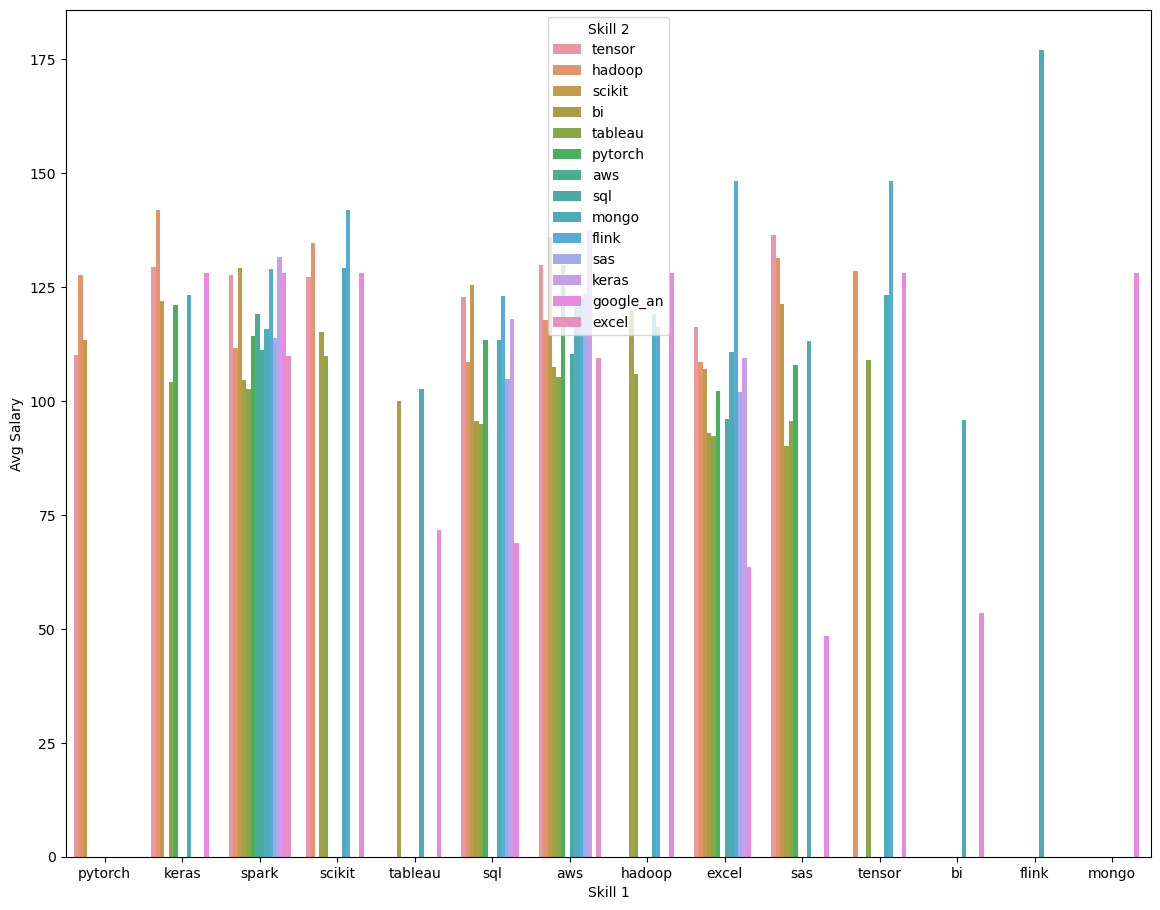

In [99]:
# @title Avg Salary by Skill Combinations
plt.figure(figsize=(14, 11))
sns.barplot(x="Skill 1", y="Avg Salary", hue="Skill 2", data=corr_groupings)

## Q.7.3. Answer:
The analysis reveals that possessing a combination of skills leads to a higher average salary by 1.11 compared to the average salary of those skills held individually. However, more data is needed to further support this conclusion

We lastly remove any sembelance of outliers as well as rows that did not meet the criteria in terms of salary increase to answer the main question:

# Q 7: Can we identify specific skill combinations that correlate to higher salary, compared to the same skills assessed individually?

In [100]:

result = corr_groupings[(corr_groupings['Average Salary Increase (Skill 1)'] >= 1) &
                      (corr_groupings['Average Salary Increase (Skill 1)'] <= 1.5) &
                      (corr_groupings['Average Salary Increase (Skill 2)'] >= 1) &
                      (corr_groupings['Average Salary Increase (Skill 2)'] <= 1.5)].reset_index(drop=True)
print("And so, the specific skill combinations that correlate to higher salary compared to their individual counterparts is as follows:")
result.head(100)

And so, the specific skill combinations that correlate to higher salary compared to their individual counterparts is as follows:


Skills  Correlation  Avg Salary  Skill 1  Avg Salary (Skill 1)  \
0     [keras, tensor]     0.530664  129.416667    keras            124.259259   
1    [scikit, tensor]     0.515166  127.303030   scikit            125.509804   
2       [tableau, bi]     0.463576  100.065217  tableau             93.900000   
3        [spark, aws]     0.297702  119.000000    spark            113.203125   
4     [spark, scikit]     0.277918  129.181818    spark            113.203125   
5       [aws, hadoop]     0.271203  117.798246      aws            112.254658   
6     [spark, tensor]     0.251828  127.710526    spark            113.203125   
7      [spark, mongo]     0.235064  115.833333    spark            113.203125   
8      [spark, flink]     0.220711  129.000000    spark            113.203125   
9        [sql, mongo]     0.203478  113.428571      sql            101.716480   
10    [hadoop, mongo]     0.201036  119.166667   hadoop            110.525641   
11       [aws, mongo]     0.188106  120.547619      aws            112.254658   
12   [scikit, hadoop]     0.138056  134.750000   scikit            125.509804   
13    [tensor, flink]     0.121268  148.250000   tensor            120.326087   
14     [spark, keras]     0.119348  131.692308    spark            113.203125   
15       [aws, keras]     0.118398  137.576923      aws            112.254658   
16      [sql, scikit]     0.116844  125.554054      sql            101.716480   
17      [aws, tensor]     0.113077  129.942308      aws            112.254658   
18     [aws, pytorch]     0.096842  129.733333      aws            112.254658   
19      [aws, scikit]     0.066795  135.911765      aws            112.254658   
20    [scikit, flink]     0.058443  142.000000   scikit            125.509804   
21      [sql, tensor]     0.040609  122.812500      sql            101.716480   
22   [spark, pytorch]     0.036894  114.363636    spark            113.203125   
23    [scikit, mongo]     0.031112  129.250000   scikit            125.509804   
24       [hadoop, bi]     0.009610  119.800000   hadoop            110.525641   
25    [keras, hadoop]     0.008400  142.000000    keras            124.259259   
26     [sql, pytorch]    -0.002538  113.342105      sql            101.716480   
27   [tensor, hadoop]    -0.009012  128.545455   tensor            120.326087   
28    [tensor, mongo]    -0.015011  123.333333   tensor            120.326087   
29  [pytorch, hadoop]    -0.038985  127.750000  pytorch            108.770270   
30      [sas, tensor]    -0.059131  136.333333      sas            113.704545   
31       [spark, sas]    -0.061933  113.900000    spark            113.203125   
32      [sas, hadoop]    -0.081301  131.300000      sas            113.704545   
33         [aws, sas]    -0.144466  123.666667      aws            112.254658   

    Skill 2  Avg Salary (Skill 2)  Average Salary Increase (Skill 1)  \
0    tensor            120.326087                           1.041505   
1    tensor            120.326087                           1.014288   
2        bi             95.681818                           1.065657   
3       aws            112.254658                           1.051208   
4    scikit            125.509804                           1.141151   
5    hadoop            110.525641                           1.049384   
6    tensor            120.326087                           1.128154   
7     mongo            113.081081                           1.023234   
8     flink            129.000000                           1.139545   
9     mongo            113.081081                           1.115144   
10    mongo            113.081081                           1.078181   
11    mongo            113.081081                           1.073876   
12   hadoop            110.525641                           1.073621   
13    flink            129.000000                           1.232069   
14    keras            124.259259                           1.163327   
15    keras            124.

# Visualizing Results

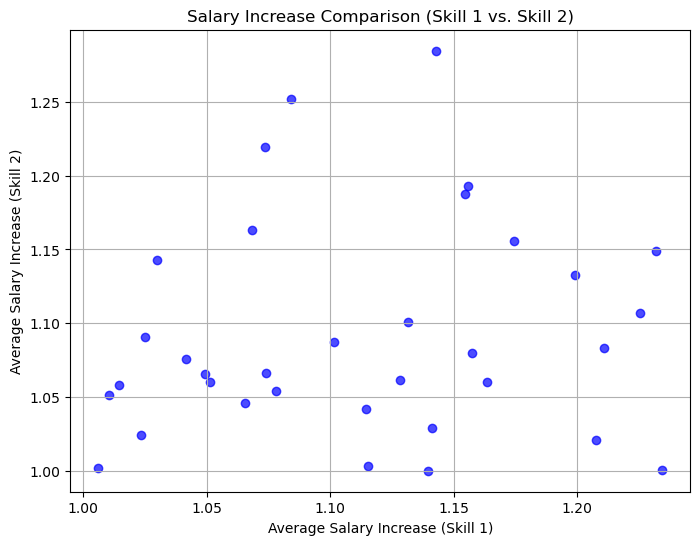

In [101]:
#@title Visualizing Results
plt.figure(figsize=(8, 6))
plt.scatter(result['Average Salary Increase (Skill 1)'], result['Average Salary Increase (Skill 2)'], c='blue', alpha=0.7)

plt.xlabel('Average Salary Increase (Skill 1)')
plt.ylabel('Average Salary Increase (Skill 2)')
plt.title('Salary Increase Comparison (Skill 1 vs. Skill 2)')

plt.grid(True)
plt.show()

# Comparing Combined Average Salary and That of The Individual Skills

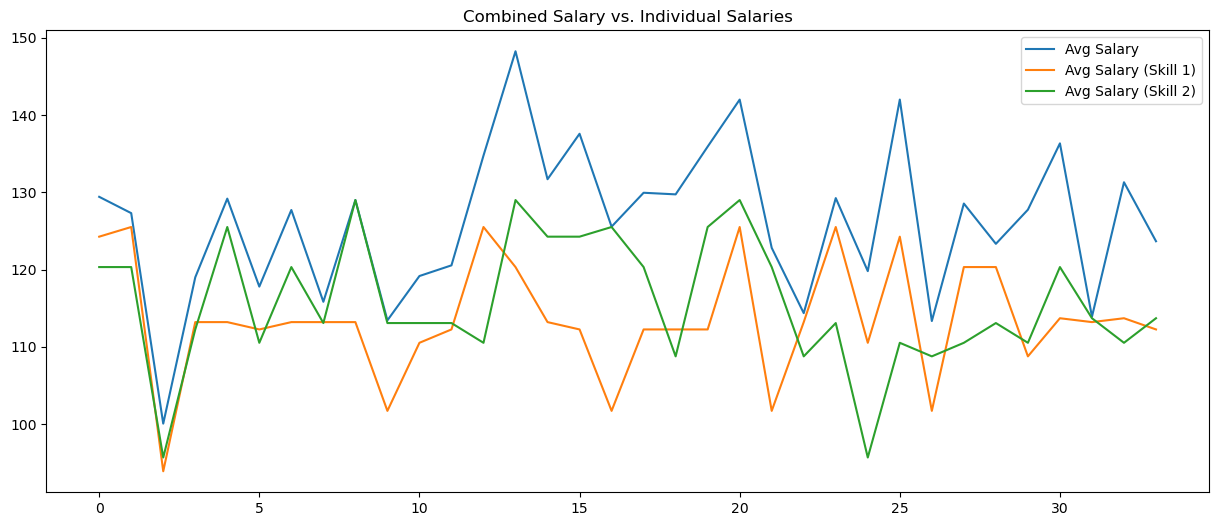

In [102]:

row_count=range(0,result.shape[0])

plt.figure(figsize=(15,6))
plt.plot(row_count,'Avg Salary',data=result)
plt.plot(row_count,'Avg Salary (Skill 1)',data=result)
plt.plot(row_count,'Avg Salary (Skill 2)',data=result)
# set title and legend
plt.title('Combined Salary vs. Individual Salaries')
plt.legend()
plt.show()

### Q.7. Answer
The results prove the following:


*   There are great correlation between som skills indicating their desirability to employers.
*   Skills grouped with high correlations tended to have the overall increase in salary compared to skills with negative correlation.


 With that being said, given the data and the results concluded above, the increase is miniscule (around 10% increase on average for each individual skill) and requires more data to further prove the hypothesis as well as greater exploration with other skill combinations that may yield more interesting results.


---



<h2> Answering Q8</h2>


**Q 8: Does the level of competition a company faces impact its employee satisfaction scores across different industries?**

•	This question comes with the assumption there is no right or false answer, and that the answer differs from one industry to another. Thus, this question is split into the following two hypotheses:

*   Lower competition with a high satisfaction rate may indicate a more casual and relaxed work environment.
*   A higher competition with a high satisfaction rate may indicate a company invests in the wellbeing of the employees to stay ahead of the competition.




To answer this question, we will first need to expand the dataset to provide a more nuanced answer.
First we will begin by importing the second dataset, cleaning it and merging it with the main dataframe.

# Importing Second Dataset

In [103]:
df_more = pd.read_csv('DataAnalyst.csv')

# Overview of The Second Dataset

**About Dataset:**
This dataset offers over 2,000 data analyst job postings with details like titles, salary estimates, locations, company ratings, job descriptions, and skills. It's a valuable resource to identify skills commonly associated with data analyst positions, identify in-demand skills, tailor resumes and increase the prospect of employability by understanding the market. This dataset complements the first dataset and provides further data to create better insights.

**Source:** https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs


In [104]:
def clean_company_name(name):
  pattern = r'\d\.\d'
  found = re.search(pattern, name)
  if found:
    return name[:found.start()]
  else:
    return name

def status(size):
  if int(size) >= 200:
    return 'Established'
  else:
    return 'Startup'

# Cleaning Second Dataset

In [105]:

# Remove duplicates
df_more.drop_duplicates(keep=("last"), inplace=True)

#Encoding
df_more['Competitors'] = df_more['Competitors'].apply(count_competitors)

# Remove negative ratings
df_more = df_more[df_more['Rating'] >= 0]

# Move values from company_txt to Company Name
df_more['Company Name'] = df_more['Company Name'].apply(clean_company_name)

# Rename unnamed column
df_more.rename(columns={'Unnamed: 0': 'index'})
# Seperate city from state
df_more.insert(7, 'Job City Location', df_more['Location'].str.split(',').str[0])
df_more.insert(8, 'Job Location', df_more['Location'].str.split(',').str[1])

# Seperate Size into Lower Size and Upper Size
df_more.insert(9, 'Lower Size', df_more['Size'].apply(lower_size))
df_more.insert(10, 'Upper Size', df_more['Size'].apply(upper_size))

# Drop redundant columns
df_more.drop(columns=['Size', 'Salary Estimate', 'Location', 'Easy Apply'], inplace=True)

Here we merge both datasets, do some cleaning and drop any unnecessary columns that don't pertain to the question

# Merging Datasets

In [106]:

merged_df = pd.merge(left=df, right=df_more, on=[	'Job Title' ,	'Job Description' ,	'Rating' ,	'Company Name' 	,'Job City Location' ,	'Job Location' 	,'Lower Size' ,	'Upper Size' ,	'Headquarters' ,	'Founded' ,	'Type of ownership'	,'Industry' 	,'Sector' 	,'Revenue' ,	'Competitors'  ], how='outer')

# Drop duplicates and unneeded columns
merged_df = merged_df.drop_duplicates(subset=['Company Name'], keep='first')

cols_to_drop = merged_df.columns[15:20]
merged_df.drop(cols_to_drop, axis=1, inplace=True)
cols_to_drop = merged_df.columns[16:36]
merged_df.drop(cols_to_drop, axis=1, inplace=True)

merged_df= merged_df.drop(merged_df[merged_df['Industry'] == '-1'].index)
merged_df.drop('Unnamed: 0', axis=1, inplace=True)

merged_df['Company Type'] = merged_df['Upper Size'].apply(status)
merged_df.head(10)

index                  Job Title  \
0     0.0             Data Scientist   
1     1.0  Healthcare Data Scientist   
2     2.0             Data Scientist   
4     3.0             Data Scientist   
6     4.0             Data Scientist   
7     5.0             Data Scientist   
9     6.0             Data Scientist   
11    7.0             Data Scientist   
13    8.0         Research Scientist   
14    9.0             Data Scientist   

                                      Job Description  Rating  \
0   Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1   What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2   KnowBe4, Inc. is a high growth information sec...     4.8   
4   *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
6   Data Scientist\nAffinity Solutions / Marketing...     2.9   
7   CyrusOne is seeking a talented Data Scientist ...     3.4   
9   Job Description\n\n**Please only local candida...     4.1   
11  Advanced Analytics – Lead Data Scientist\nOver...     3.8   
13  SUMMARY\n\nThe Research Scientist I will be ta...     3.3   
14  isn’t your usual company. Our work is powered ...     4.6   

                             Company Name Job City Location    Headquarters  \
0                       Tecolote Research       Albuquerque      Goleta, CA   
1   University of Maryland Medical System         Linthicum   Baltimore, MD   
2                                 KnowBe4        Clearwater  Clearwater, FL   
4                                    PNNL          Richland    Richland, WA   
6                      Affinity Solutions          New York    New York, NY   
7                                CyrusOne            Dallas      Dallas, TX   
9                      ClearOne Advantage         Baltimore   Baltimore, MD   
11                             Logic20/20          San Jose     Seattle, WA   
13              Rochester Regional Health         Rochester   Rochester, NY   
14                               <intent>          New York    New York, NY   

   Lower Size Upper Size  Founded   Type of ownership  \
0         501       1000     1973   Company - Private   
1       10000      10000     1984  Other Organization   
2         501       1000     2010   Company - Private   
4        1001       5000     1965          Government   
6          51        200     1998   Company - Private   
7         201        500     2000    Company - Public   
9         501       1000     2008   Company - Private   
11        201        500     2005   Company - Private   
13      10000      10000     2014            Hospital   
14         51        200     2009   Company - Private   

                            Industry                        Sector  \
0                Aerospace & Defense           Aerospace & Defense   
1   Health Care Services & Hospitals                   Health Care   
2                  Security Services             Business Services   
4                             Energy  Oil, Gas, Energy & Utilities   
6            Advertising & Marketing             Business Services   
7                        Real Estate                   Real Estate   
9              Banks & Credit Unions                       Finance   
11                        Consulting             Business Services   
13  Health Care Services & Hospitals                   Health Care   
14                          Internet        Information Technology   

                             Revenue  Competitors Job Location  \
0          $50 to $100 million (USD)            0           NM   
1             $2 to $5 billion (USD)            0           MD   
2         $100 to $500 million (USD)            0           FL   
4   $500 million to $1 billion (USD)            3           WA   
6           Unknown / Non-Applicable            3           NY   
7             $1 to $2 billion (USD)            3           TX   
9           Unknown / Non-Applicable            0           MD   
11          $25 to $50 million (USD)            0 

Starting from here, we begin to group by industry for the newly merged dataframe.
Afterwards, we make correlations between each 'Competitor' and 'Rating' for each row for a given industry and store them in their respective lists.

In [107]:
correlations_by_industry = {}
for industry, group_data in merged_df.groupby('Industry'):
  correlation_acquired = group_data['Competitors'].corr(group_data['Rating'])
  if not pd.isna(correlation_acquired):
    correlations_by_industry[industry] = correlation_acquired

industry_names = list(correlations_by_industry.keys())
correlations = list(correlations_by_industry.values())

We begin to visualize the correlation accordingly using a horizontal barchart that shows the correlation between the two columns for each industry.

*   A positive correlation indicates that as the number of competitors in an industry increases, the average rating for that industry tends to increase
as well.
*   A negative correlation indicates that as the number of competitors in an industry increases, the average rating for that industry tends to decrease.

# Visualizing Positive And Negative Correlations

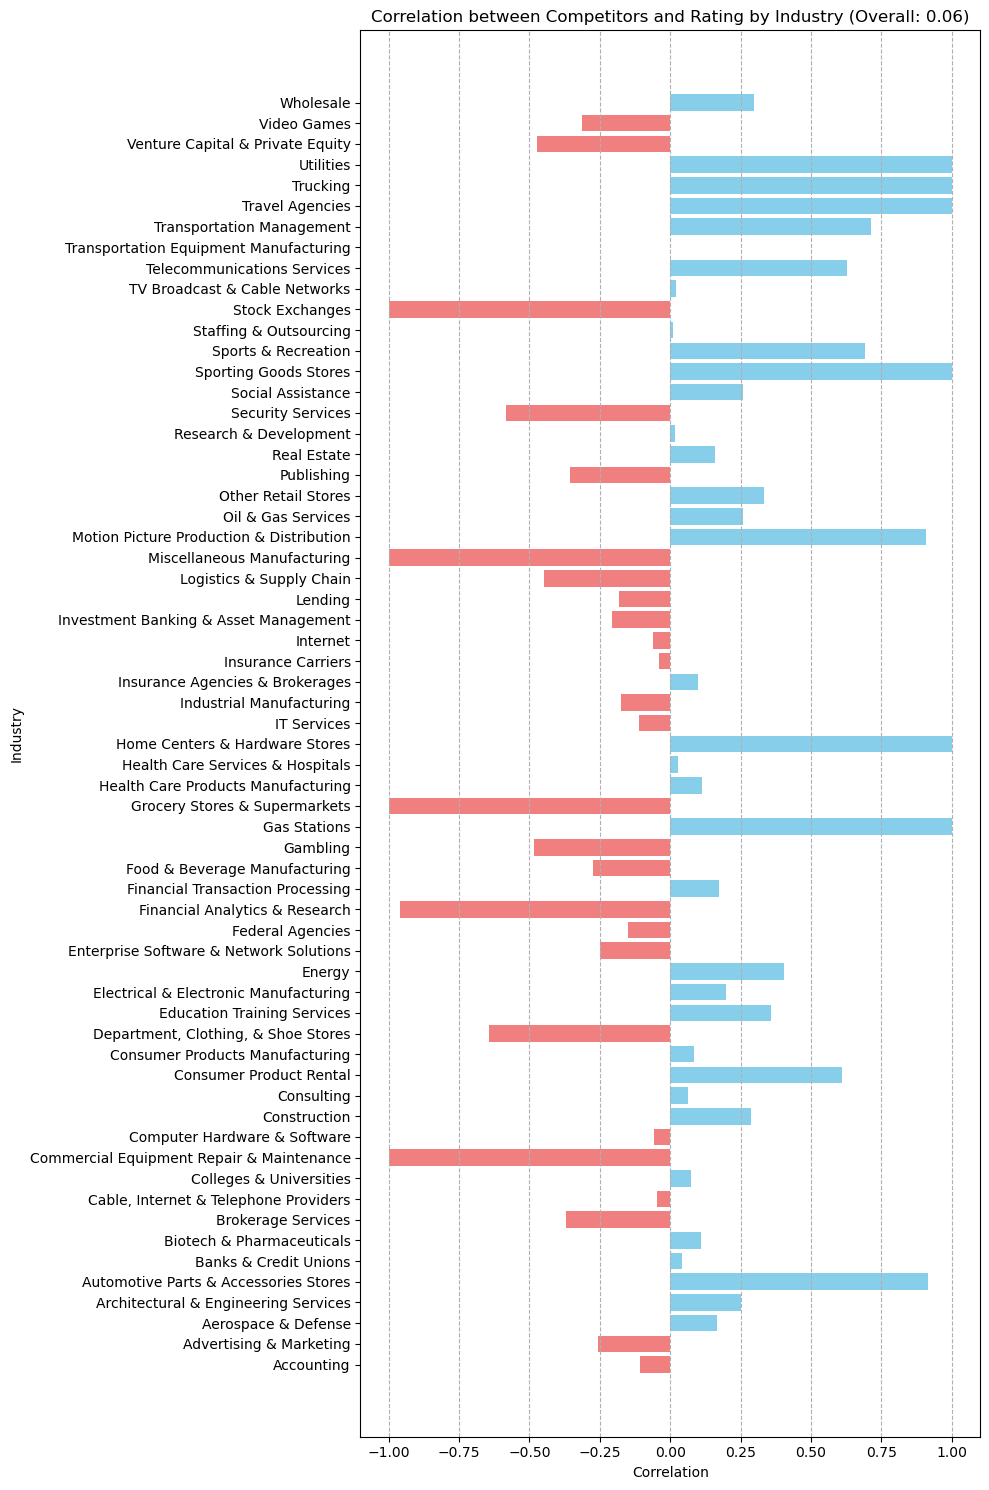

In [108]:

plt.figure(figsize=(10, 15))
colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlations]
plt.barh(industry_names, correlations, color=colors)

plt.xlabel('Correlation')
plt.ylabel('Industry')
title = f'Correlation between Competitors and Rating by Industry (Overall: {sum(correlations) / len(correlations):.2f})'
plt.title(title)
plt.yticks(industry_names)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

It would've been straightforward from there to say that it's apparent which industries tend to have a high correlation between their competition and their employee satisfaction rating and move on. However, there is a single element that has been forgotten from this analysis.

# Count Samples Per Industry

In [109]:

industry_value_counts = merged_df['Industry'].value_counts().to_dict()

counts_df = pd.DataFrame.from_dict(industry_value_counts, orient='index')
counts_df.columns = columns=['Count']

counts_df.head(50)

Count
IT Services                                 185
Staffing & Outsourcing                      144
Health Care Services & Hospitals            131
Computer Hardware & Software                 99
Consulting                                   94
Enterprise Software & Network Solutions      73
Internet                                     63
Biotech & Pharmaceuticals                    57
Advertising & Marketing                      50
Insurance Carriers                           49
Investment Banking & Asset Management        48
Banks & Credit Unions                        39
Aerospace & Defense                          32
Colleges & Universities                      29
Social Assistance                            24
Research & Development                       21
Lending                                      18
Video Games                                  16
Consumer Products Manufacturing              16
Accounting                                   15
Real Estate                                  12
Federal Agencies                             11
Logistics & Supply Chain                     11
Financial Transaction Processing             11
Health, Beauty, & Fitness                    10
TV Broadcast & Cable Networks                10
Wholesale                                     9
Energy                                        9
State & Regional Agencies                     9
Industrial Manufacturing                      9
Architectural & Engineering Services          8
Municipal Governments                         8
Brokerage Services                            8
Department, Clothing, & Shoe Stores           8
Insurance Agencies & Brokerages               7
Food & Beverage Manufacturing                 7
Construction                                  7
Electrical & Electronic Manufacturing         6
Health Care Products Manufacturing            6
Publishing                                    5
K-12 Education                                5
Security Services                             5
Telecommunications Services                   5
Venture Capital & Private Equity              5
Financial Analytics & Research                4
Legal                                         4
Education Training Services                   4
Automotive Parts & Accessories Stores         4
Oil & Gas Services                            4
Motion Picture Production & Distribution      4

The sample size was not taken into account, and thus the correlation for some industries is very skewed in either directions. Thus, we assume anything above 20 sample sizes, although little, will suffice to create a more appropriate set of calculations.

# Q 8: Does the level of competition a company faces impact its employee satisfaction scores across different industries?

In [110]:

industry_values_sorted = merged_df['Industry'].value_counts().sort_values(ascending=True).to_dict()
threshold = 20
sorted_correlations_by_industry = {}
for industry, count in industry_values_sorted.items():
  if count >=threshold:
    sorted_correlations_by_industry[industry] = correlations_by_industry[industry]

industry_names = list(sorted_correlations_by_industry.keys())
correlations = list(sorted_correlations_by_industry.values())


# Visualize Results

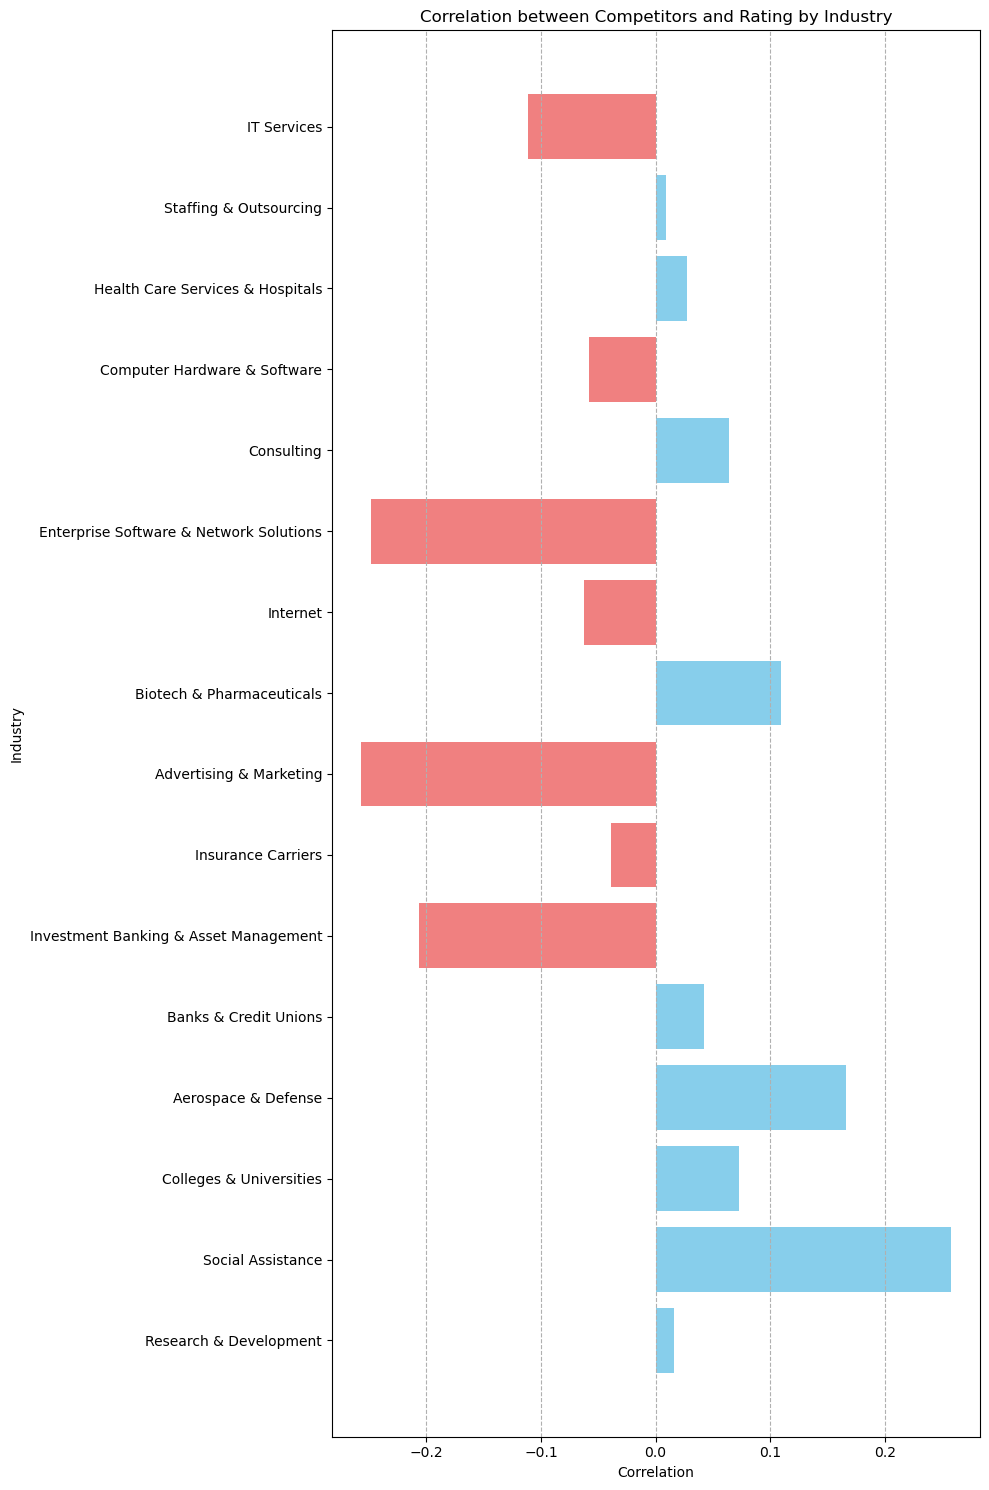

In [111]:

plt.figure(figsize=(10, 15))
colors = ['skyblue' if corr > 0 else 'lightcoral' for corr in correlations]
plt.barh(industry_names, correlations, color=colors)

plt.xlabel('Correlation')
plt.ylabel('Industry')
title = f'Correlation between Competitors and Rating by Industry'
plt.title(title)
plt.yticks(industry_names)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()



### Q.8. Answer
So, although not accounted for initially, the numbers show very weak/negligible correlation between the number of competitors each company has and its average rating in correspondance to each industry. Thus, the answer is there is no correlation between the two.